# **SMU BOSS Bidding Data Quality check**

## Purpose
- To prepare ingestion of data into AfterClass.
- Upon combining the scraped data into a CSV file, we noticed that there were some data quality issues. This IPYNB file is to find potential data quality issues and to find ways to mitigate it.

## Identified issues
- Instructors having multi-valued attributes.
- Class1_day having multi-valued attributes.
- Term has different naming convetions whereas .xls downloaded only has one naming convention

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the dataset
data = pd.read_csv('transformed_data_w_timings_v3.csv', dtype={'CatalogueNo': str})

C:\Users\tanzh\AppData\Local\Temp\ipykernel_21988\3148326935.py:2: DtypeWarning: Columns (0,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('transformed_data_w_timings_v3.csv', dtype={'CatalogueNo': str})


In [4]:
data.head()

,Term,Description,Section,Vacancy,Before Process Vacancy,Median Bid,Min Bid,Instructor,Grading Basis,class1_day,...,exam_startdate,exam_day,exam_starttime,AY,Incoming Freshman,Incoming Exchange,Round,Window,SubjectArea,CatalogueNo
0,2,Financial Reporting and Analysis,G3,42,3,25.00,25.00,GOH BENG WEE,Graded,Wed,...,20-Apr-2022,Wed,08:30,2021,no,no,2A,3,ACCT,224
1,2,Valuation,G1,42,9,10.09,10.09,CHENG NAM SANG,Graded,Mon,...,27-Apr-2022,Wed,08:30,2021,no,no,2A,3,ACCT,336
2,2,Valuation,G2,42,12,10.03,10.00,CHENG NAM SANG,Graded,Mon,...,27-Apr-2022,Wed,08:30,2021,no,no,2A,3,ACCT,336
3,2,Auditing for the Public Sector,G1,42,7,25.00,25.00,LIM SOO PING,Graded,Thu,...,27-Apr-2022,Wed,13:00,2021,no,no,2A,3,ACCT,409
4,2,Public Relations Writing,G1,45,10,10.00,10.00,YASMIN HANNAH RAMLE,Graded,Thu,...,NaN,NaN,NaN,2021,no,no,2A,3,COMM,225


In [5]:
data.describe(include='all')

,Term,Description,Section,Vacancy,Before Process Vacancy,Median Bid,Min Bid,Instructor,Grading Basis,class1_day,...,exam_startdate,exam_day,exam_starttime,AY,Incoming Freshman,Incoming Exchange,Round,Window,SubjectArea,CatalogueNo
count,35734,35734,35734,35734.000000,35734.000000,35734.000000,35734.000000,35734,30909,30531,...,22456,22456,22456,35734.000000,35734,35734,35734,35734.00000,35734,35734
unique,5,667,45,NaN,NaN,NaN,NaN,929,2,7,...,82,6,3,NaN,2,2,6,NaN,55,373
top,2,Management Communication,G1,NaN,NaN,NaN,NaN,Not Assigned Yet,Graded,Tue,...,25-Nov-2022,Fri,08:30,NaN,no,no,1,NaN,COR,101
freq,16437,1388,14088,NaN,NaN,NaN,NaN,509,30699,6955,...,471,4731,11331,NaN,34579,31787,10185,NaN,5266,2671
mean,NaN,NaN,NaN,43.333156,12.125259,27.409722,22.706312,NaN,NaN,NaN,...,NaN,NaN,NaN,2022.609811,NaN,NaN,NaN,1.51763,NaN,NaN
std,NaN,NaN,NaN,5.700971,12.451885,16.860290,15.130064,NaN,NaN,NaN,...,NaN,NaN,NaN,1.010684,NaN,NaN,NaN,0.65875,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.000000,10.000000,10.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2021.000000,NaN,NaN,NaN,1.00000,NaN,NaN
25%,NaN,NaN,NaN,45.000000,2.000000,15.092500,10.300000,NaN,NaN,NaN,...,NaN,NaN,NaN,2022.000000,NaN,NaN,NaN,1.00000,NaN,NaN
50%,NaN,NaN,NaN,45.000000,7.000000,24.000000,17.890000,NaN,NaN,NaN,...,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,1.00000,NaN,NaN
75%,NaN,NaN,NaN,45.000000,19.000000,35.000000,30.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,2023.000000,NaN,NaN,NaN,2.00000,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35734 entries, 0 to 35733
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Term                    35734 non-null  object 
 1   Description             35734 non-null  object 
 2   Section                 35734 non-null  object 
 3   Vacancy                 35734 non-null  int64  
 4   Before Process Vacancy  35734 non-null  int64  
 5   Median Bid              35734 non-null  float64
 6   Min Bid                 35734 non-null  float64
 7   Instructor              35734 non-null  object 
 8   Grading Basis           30909 non-null  object 
 9   class1_day              30531 non-null  object 
 10  class1_starttime        30370 non-null  object 
 11  class1_venue            30336 non-null  object 
 12  class2_day              880 non-null    object 
 13  class2_starttime        880 non-null    object 
 14  class2_venue            880 non-null  

In [7]:
data.isnull().sum()

Term                          0
Description                   0
Section                       0
Vacancy                       0
Before Process Vacancy        0
Median Bid                    0
Min Bid                       0
Instructor                    0
Grading Basis              4825
class1_day                 5203
class1_starttime           5364
class1_venue               5398
class2_day                34854
class2_starttime          34854
class2_venue              34854
class3_day                35677
class3_starttime          35677
class3_venue              35677
exam_startdate            13278
exam_day                  13278
exam_starttime            13278
AY                            0
Incoming Freshman             0
Incoming Exchange             0
Round                         0
Window                        0
SubjectArea                   0
CatalogueNo                   0
dtype: int64

In [8]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

## ISSUE: Investigate missing grading basis

In [9]:
data['Grading Basis'].value_counts()

Grading Basis
Graded       30699
Pass/Fail      210
Name: count, dtype: int64

In [10]:
missing_grading_basis_data = data[data['Grading Basis'].isna()]
missing_grading_basis_data.head(10)

,Term,Description,Section,Vacancy,Before Process Vacancy,Median Bid,Min Bid,Instructor,Grading Basis,class1_day,...,exam_startdate,exam_day,exam_starttime,AY,Incoming Freshman,Incoming Exchange,Round,Window,SubjectArea,CatalogueNo
6,2,Management Communication,G8,30,3,35.00,35.00,CHAN BOH YEE,NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,3,COR-COMM,1304
7,2,Japanese,G3,45,2,26.45,26.44,"AKIKO ITO, AKIKO ITO",NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,3,COR-JPAN,2401
8,2,"Business, Government and Society",G3,45,5,25.00,25.00,CHAN KAY MIN,NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,3,COR-MGMT,1302
45,2,Management Communication,G19,30,3,10.00,10.00,LINDY ONG,NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,2,COR-COMM,1304
46,2,Japanese,G2,45,1,10.01,10.01,"AKIKO ITO, AKIKO ITO",NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,2,COR-JPAN,2401
47,2,"Constitutions, Cultures, and Context",G1,38,1,21.67,21.67,MAARTJE DE VISSER,NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,2,COR-LAW,2610
48,2,Jurisprudence: Modern and Critical Theories of...,G1,38,8,17.17,17.17,TAN SEOW HON,NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,2,COR-LAW,2612
49,2,"Business, Government and Society",G11,45,2,10.03,10.03,GILBERT TAN YIP WEI,NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,2,COR-MGMT,1302
116,2,Management Communication,G21,30,1,12.77,12.77,LINDY ONG,NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,1,COR-COMM,1304
117,2,Management Communication,G30,30,1,10.00,10.00,VANDANA ADVANI,NaN,NaN,...,NaN,NaN,NaN,2021,no,no,2A,1,COR-COMM,1304


In [11]:
missing_grading_basis_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Term,4825,5,1,2315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,4825,72,Management Communication,1388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,4825,42,G1,1270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vacancy,4825.0,NaN,NaN,NaN,39.786736,7.707542,4.0,30.0,45.0,45.0,46.0
Before Process Vacancy,4825.0,NaN,NaN,NaN,11.005389,11.243239,0.0,2.0,6.0,17.0,45.0
Median Bid,4825.0,NaN,NaN,NaN,28.591422,15.236722,10.0,17.9,25.69,35.89,168.0
Min Bid,4825.0,NaN,NaN,NaN,23.923685,14.195842,10.0,12.0,20.0,30.91,150.0
Instructor,4825,120,ROSIE CHING,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grading Basis,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class1_day,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
missing_grading_basis_data[missing_grading_basis_data['Description']=='Management Communication'].head(1).T

,6
Term,2
Description,Management Communication
Section,G8
Vacancy,30
Before Process Vacancy,3
Median Bid,35.0
Min Bid,35.0
Instructor,CHAN BOH YEE
Grading Basis,NaN
class1_day,NaN


## ROOT CAUSE: Scraping logic not waiting for website to be fully loaded, skipping it
Investigating into row 6 more, I found the class at https://boss.intranet.smu.edu.sg/ClassDetails.aspx?SelectedClassNumber=1609&SelectedAcadTerm=2120&SelectedAcadCareer=UGRD, which was not recorded in the csv. 

From this, I have identified that the scraping code didn't wait for page elements to load completely before attempting to extract data, thus causing the code to skip the page.

## FIX: Wait until page is healthy before scraping
To fix this, the code will have to `WebDriverWait.until()` function from selenium to wait for the page to load before extracting data.

---

## ISSUE: Missing class1_day

In [13]:
missing_class1_day_data = data[data['Grading Basis'].notna() & data['class1_day'].isna()]
missing_class1_day_data.head(10)

,Term,Description,Section,Vacancy,Before Process Vacancy,Median Bid,Min Bid,Instructor,Grading Basis,class1_day,...,exam_startdate,exam_day,exam_starttime,AY,Incoming Freshman,Incoming Exchange,Round,Window,SubjectArea,CatalogueNo
1732,2,Virtual Business Professional,G1,25,16,25.00,25.00,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1B,2,WRIT,200
2218,2,Virtual Business Professional,G1,25,15,12.28,12.28,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1B,1,WRIT,200
2483,2,Health Economics(SMU-X),G3,45,38,20.00,20.00,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1A,2,ECON,215
2617,2,The Singapore International Arbitration Centre...,G1,38,32,11.01,11.01,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1A,2,LAW,4020
2675,2,Entrepreneurship Practicum(SMU-X),G2,45,38,12.01,12.01,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1A,2,MGMT,327
2723,2,Legal Environment and Employment Relations,G1,45,31,13.98,11.74,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1A,2,OBHR,232
2739,2,Operations Strategy: Principles and Practice,G1,45,26,15.85,11.66,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1A,2,OPIM,319
2783,2,Virtual Business Professional,G1,25,15,11.20,10.00,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1A,2,WRIT,200
2814,2,Accounting Information Systems,G4,45,32,10.89,10.00,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1A,1,ACCT,221
2834,2,Advanced Financial Accounting,G2,45,27,20.00,20.00,Not Assigned Yet,Graded,NaN,...,NaN,NaN,NaN,2021,no,no,1A,1,ACCT,335


In [14]:
missing_class1_day_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Term,378,5,2,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,378,107,Computing Technology For Finance,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Section,378,13,G1,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vacancy,378.0,NaN,NaN,NaN,43.185185,5.658973,7.0,45.0,45.0,45.0,45.0
Before Process Vacancy,378.0,NaN,NaN,NaN,30.325397,7.695976,0.0,27.0,31.5,36.0,45.0
Median Bid,378.0,NaN,NaN,NaN,18.85082,10.678839,10.0,11.8825,15.45,21.585,95.4
Min Bid,378.0,NaN,NaN,NaN,13.763492,7.647385,10.0,10.0,10.105,15.0,95.4
Instructor,378,3,Not Assigned Yet,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grading Basis,378,2,Graded,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class1_day,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
missing_class1_day_data.head(10).T

,1732,2218,2483,2617,2675,2723,2739,2783,2814,2834
Term,2,2,2,2,2,2,2,2,2,2
Description,Virtual Business Professional,Virtual Business Professional,Health Economics(SMU-X),The Singapore International Arbitration Centre...,Entrepreneurship Practicum(SMU-X),Legal Environment and Employment Relations,Operations Strategy: Principles and Practice,Virtual Business Professional,Accounting Information Systems,Advanced Financial Accounting
Section,G1,G1,G3,G1,G2,G1,G1,G1,G4,G2
Vacancy,25,25,45,38,45,45,45,25,45,45
Before Process Vacancy,16,15,38,32,38,31,26,15,32,27
Median Bid,25.0,12.28,20.0,11.01,12.01,13.98,15.85,11.2,10.89,20.0
Min Bid,25.0,12.28,20.0,11.01,12.01,11.74,11.66,10.0,10.0,20.0
Instructor,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet
Grading Basis,Graded,Graded,Graded,Graded,Graded,Graded,Graded,Graded,Graded,Graded
class1_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
missing_class1_day_data.loc[1732].T

Term                                                  2
Description               Virtual Business Professional
Section                                              G1
Vacancy                                              25
Before Process Vacancy                               16
Median Bid                                         25.0
Min Bid                                            25.0
Instructor                             Not Assigned Yet
Grading Basis                                    Graded
class1_day                                          NaN
class1_starttime                                    NaN
class1_venue                                        NaN
class2_day                                          NaN
class2_starttime                                    NaN
class2_venue                                        NaN
class3_day                                          NaN
class3_starttime                                    NaN
class3_venue                                    

In [17]:
missing_class1_day_data.loc[2814].T

Term                                                   2
Description               Accounting Information Systems
Section                                               G4
Vacancy                                               45
Before Process Vacancy                                32
Median Bid                                         10.89
Min Bid                                             10.0
Instructor                              Not Assigned Yet
Grading Basis                                     Graded
class1_day                                           NaN
class1_starttime                                     NaN
class1_venue                                         NaN
class2_day                                           NaN
class2_starttime                                     NaN
class2_venue                                         NaN
class3_day                                           NaN
class3_starttime                                     NaN
class3_venue                   

## ROOT CAUSE: (1) There is no physical class or (2) Class no longer exists

### SUB-ISSUE 1: There is no physical class
Investigating into row 1732 more, I found the class at https://boss.intranet.smu.edu.sg/ClassDetails.aspx?SelectedClassNumber=2052&SelectedAcadTerm=2120&SelectedAcadCareer=UGRD, was recorded in the csv. 
The class was virtual, so there was no class location.

### SUB-ISSUE 2: Class no longer exists in OverallResults
Investigating into row 2814 more, I found the class at https://boss.intranet.smu.edu.sg/ClassDetails.aspx?SelectedClassNumber=1778&SelectedAcadTerm=2120&SelectedAcadCareer=UGRD, was recorded in the csv. 

Upon looking at https://boss.intranet.smu.edu.sg/OverallResults.aspx, I found that the record did not exist in the Overall Results, likely because it was a class that they decided not to use.

However, it existed in the BOSS results excel table given to us at OASIS.

In [18]:
data.groupby(['Round','Window'])[['Round','Window']].value_counts()

Round  Window
1      1         6524
       2         3357
       3          175
       4          129
1A     1         4822
       2         3577
       3          744
1B     1         2811
       2         2139
1C     1         2264
       2         1083
       3          600
2      1         3177
       2         1782
       3         1145
       4            9
       5            2
2A     1          787
       2          405
       3          202
Name: count, dtype: int64

In [19]:
# Group by class identifiers and count total rows
class_row_counts = (
    data[data['Grading Basis'].notna() & data['class1_day'].isna()]
    .groupby(['CatalogueNo', 'SubjectArea', 'Section', 'AY', 'Term'])
    .size()
    .reset_index(name='num_rows')
)

# Filter if needed
low_activity_classes = class_row_counts[class_row_counts['num_rows'] <= 14]

low_activity_classes = low_activity_classes.sort_values(by='AY', ascending=True)
low_activity_classes.head(10)

,CatalogueNo,SubjectArea,Section,AY,Term,num_rows
1,100,IDIS,G2,2021,2,3
13,103,MKTG,G7,2021,2,2
14,103,MKTG,G8,2021,2,3
15,104,MGMT,G2,2021,2,3
12,103,MKTG,G5,2021,2,1
11,103,FNCE,G2,2021,2,3
30,200,WRIT,G1,2021,2,6
26,1305,COR,G9,2021,2,3
25,1305,COR,G15,2021,2,2
61,221,ACCT,G4,2021,2,3


In [20]:
low_activity_classes.count()

CatalogueNo    137
SubjectArea    137
Section        137
AY             137
Term           137
num_rows       137
dtype: int64

In [21]:
# Define the correct ordering of bidding phases
custom_order = [
    '1-1', '1-2',
    '1A-1', '1A-2',
    '1B-1', '1B-2',
    '2-1', '2-2', '2-3', '2-4', '2-5',
    '2A-1', '2A-2', '2A-3'
]

# Create a combined identifier for round and window
data['bidding_phase'] = data['Round'].astype(str) + '-' + data['Window'].astype(str)

# Convert to ordered categorical to ensure proper sorting
data['bidding_phase'] = pd.Categorical(
    data['bidding_phase'], 
    categories=custom_order, 
    ordered=True
)

# Find the maximum round and window for each class
max_phases = (
    data
    .groupby(['CatalogueNo', 'SubjectArea', 'Section', 'AY', 'Term'])['bidding_phase']
    .max()
    .reset_index()
)

# Define target phase
target_phase = '2A-3'

# Filter classes that didn't reach Round 2A, Window 3
classes_not_reaching_2A_3 = max_phases[max_phases['bidding_phase'] < target_phase]

# Sort and display results
classes_not_reaching_2A_3 = classes_not_reaching_2A_3.sort_values(by='AY', ascending=True)
classes_not_reaching_2A_3.head(10)

,CatalogueNo,SubjectArea,Section,AY,Term,bidding_phase
2871,201,LGST,G4,2021,2,2A-1
2900,201,OPIM,G10,2021,2,2A-1
31,001,PSYC,G4,2021,2,2A-1
24,001,PSYC,G3,2021,2,2-1
6,001,GA,G1,2021,2,2-2
4,001,FNAR,G1,2021,2,2-3
5479,3301,COR,G9,2021,2,2-2
991,102,MGMT,G6,2021,2,2-2
984,102,MGMT,G5,2021,2,2-2
5499,3302,COR,G3,2021,2,1B-2


## FIX: Filter out classes that did not reach Round 2A Window 3
- Upon investigating, not all records in the above code indicate phantom classes. However, investigating MKTG103 in AY2021T2 for G5, G7, G8, it is no longer available in OverallResults.
- The current data omits any records with `Min Bid` == 0, which means that some of the missing `bidding_phase` are not caused by dropped classes, but by lack of active bidders.
- This means that the phantom classes that were cancelled due to lack of venue or instructors did not make it to Round 2A Window 3, making it a suitable filtering option to remove phantom classes.

To fix SUB-ISSUE 2, drop any rows with 0 median/min bid prices, no class1_day, and did not reach Round 2A Window 3.

## ISSUE: class1_day, class1_venue, class1_starttime are not consistent
Most often, `class1_day`, `class1_venue`, `class1_starttime` will share the same count. However, there is a discrepency.

Lets create the following conditions as a combination of `class1_day`, `class1_venue`, `class1_starttime`

Conditions:
1. class1_day exists without venue and start time
2. venue exists without class1_day and start time
3. start time exists without class1_day and venue
4. class1_day and venue exist without start time
5. class1_day and start time exist without venue
6. all three do not exist

In [22]:
# Define the unique identifier columns
unique_cols = ['Term', 'AY', 'SubjectArea', 'CatalogueNo', 'Section']

# Condition 1: class1_day exists without venue and start time
cond1 = data[(data['class1_day'].notna()) & (data['class1_venue'].isna()) & (data['class1_starttime'].isna())]
cond1_unique = cond1.drop_duplicates(subset=unique_cols)

# Condition 2: venue exists without class1_day and start time
cond2 = data[(data['class1_venue'].notna()) & (data['class1_day'].isna()) & (data['class1_starttime'].isna())]
cond2_unique = cond2.drop_duplicates(subset=unique_cols)

# Condition 3: start time exists without class1_day and venue
cond3 = data[(data['class1_starttime'].notna()) & (data['class1_day'].isna()) & (data['class1_venue'].isna())]
cond3_unique = cond3.drop_duplicates(subset=unique_cols)

# Condition 4: class1_day and venue exist without start time
cond4 = data[(data['class1_day'].notna()) & (data['class1_venue'].notna()) & (data['class1_starttime'].isna())]
cond4_unique = cond4.drop_duplicates(subset=unique_cols)

# Condition 5: class1_day and start time exist without venue
cond5 = data[(data['class1_day'].notna()) & (data['class1_starttime'].notna()) & (data['class1_venue'].isna())]
cond5_unique = cond5.drop_duplicates(subset=unique_cols)

# Condition 6: all three do not exist
cond6 = data[(data['class1_day'].isna()) & (data['class1_venue'].isna()) & (data['class1_starttime'].isna())]
cond6_unique = cond6.drop_duplicates(subset=unique_cols)

# Output the counts for each condition
counts = {
    'class1_day without venue and start time': len(cond1_unique),
    'venue without class1_day and start time': len(cond2_unique),
    'start time without class1_day and venue': len(cond3_unique),
    'class1_day and venue without start time': len(cond4_unique),
    'class1_day and start time without venue': len(cond5_unique),
    'all three missing': len(cond6_unique)
}

print(counts)

{'class1_day without venue and start time': 86, 'venue without class1_day and start time': 0, 'start time without class1_day and venue': 0, 'class1_day and venue without start time': 1, 'class1_day and start time without venue': 8, 'all three missing': 1044}


In [23]:
cond1_unique[cond1_unique['class1_day']==' '].count()

Term                      86
Description               86
Section                   86
Vacancy                   86
Before Process Vacancy    86
Median Bid                86
Min Bid                   86
Instructor                86
Grading Basis             86
class1_day                86
class1_starttime           0
class1_venue               0
class2_day                 0
class2_starttime           0
class2_venue               0
class3_day                 0
class3_starttime           0
class3_venue               0
exam_startdate             0
exam_day                   0
exam_starttime             0
AY                        86
Incoming Freshman         86
Incoming Exchange         86
Round                     86
Window                    86
SubjectArea               86
CatalogueNo               86
bidding_phase             86
dtype: int64

### SUB-ISSUE 1: Empty spaces constituting non-null values
After checking the first condition, I found non-null values consiting of empty strings with spaces.
To fix this, we will strip all class1_day first, and then recalculate the null values for each of the condition.

In [24]:
data['class1_day'] = data['class1_day'].str.strip()  # Convert '   ' to ''
data['class1_day'] = data['class1_day'].replace('', np.nan)  # Convert '' to NaN
# Rerun above code afterwards

### Checking condition 2: venue without class1_day and start time

In [25]:
cond2_unique.head(1).T

""
Term
Description
Section
Vacancy
Before Process Vacancy
Median Bid
Min Bid
Instructor
Grading Basis
class1_day


The `class1_day` and `class1_starttime` was not updated. Thus resulting in this anomaly.

### Checking condition 5: class1_day and start time without venue

In [26]:
cond5_unique.T

,180,1166,11367,11665,11940,13757,14390,14993
Term,2,2,2,2,2,2,2,2
Description,"Consumer Law, Digital Market and New Technologies","Consumer Law, Digital Market and New Technologies",European Business Law,Comparative Secured Transactions Law,Consumer Law in Australasia,Consumer Law in Australasia,Comparative Secured Transactions Law,European Business Law
Section,G1,G61,G1,G1,G1,G61,G61,G61
Vacancy,38,7,38,38,38,7,7,7
Before Process Vacancy,1,1,7,29,26,4,1,6
Median Bid,35.0,11.08,50.0,10.0,31.11,12.88,45.02,30.0
Min Bid,35.0,11.08,50.0,10.0,12.2,12.88,45.02,12.35
Instructor,MATEJA DUROVIC,MATEJA DUROVIC,LEONARDO BORLINI,ORKUN AKSELI,LUKE NOTTAGE,LUKE NOTTAGE,ORKUN AKSELI,LEONARDO BORLINI
Grading Basis,Graded,Graded,Graded,Graded,Graded,Graded,Graded,Graded
class1_day,Wed,Wed,Wed,Thu,Mon,Mon,Thu,Wed


Upon checking each of their ClassDetails pages, we can confirm that the reason why `class1_venue` was missing was due to online classes.

### Checking condition 6: all missing

In [27]:
cond6_unique.head(5).T

,6,7,8,45,46
Term,2,2,2,2,2
Description,Management Communication,Japanese,"Business, Government and Society",Management Communication,Japanese
Section,G8,G3,G3,G19,G2
Vacancy,30,45,45,30,45
Before Process Vacancy,3,2,5,3,1
Median Bid,35.0,26.45,25.0,10.0,10.01
Min Bid,35.0,26.44,25.0,10.0,10.01
Instructor,CHAN BOH YEE,"AKIKO ITO, AKIKO ITO",CHAN KAY MIN,LINDY ONG,"AKIKO ITO, AKIKO ITO"
Grading Basis,NaN,NaN,NaN,NaN,NaN
class1_day,NaN,NaN,NaN,NaN,NaN


In [28]:
cond6_unique.count()

Term                      1044
Description               1044
Section                   1044
Vacancy                   1044
Before Process Vacancy    1044
Median Bid                1044
Min Bid                   1044
Instructor                1044
Grading Basis              137
class1_day                   0
class1_starttime             0
class1_venue                 0
class2_day                   0
class2_starttime             0
class2_venue                 0
class3_day                   0
class3_starttime             0
class3_venue                 0
exam_startdate               0
exam_day                     0
exam_starttime               0
AY                        1044
Incoming Freshman         1044
Incoming Exchange         1044
Round                     1044
Window                    1044
SubjectArea               1044
CatalogueNo               1044
bidding_phase              994
dtype: int64

In [29]:
1130-223

907

In [30]:
cond6.count()

Term                      5203
Description               5203
Section                   5203
Vacancy                   5203
Before Process Vacancy    5203
Median Bid                5203
Min Bid                   5203
Instructor                5203
Grading Basis              378
class1_day                   0
class1_starttime             0
class1_venue                 0
class2_day                   0
class2_starttime             0
class2_venue                 0
class3_day                   0
class3_starttime             0
class3_venue                 0
exam_startdate               0
exam_day                     0
exam_starttime               0
AY                        5203
Incoming Freshman         5203
Incoming Exchange         5203
Round                     5203
Window                    5203
SubjectArea               5203
CatalogueNo               5203
bidding_phase             4622
dtype: int64

In [31]:
5352-527

4825

In [32]:
data[data['Grading Basis'].isna()].count()

Term                      4825
Description               4825
Section                   4825
Vacancy                   4825
Before Process Vacancy    4825
Median Bid                4825
Min Bid                   4825
Instructor                4825
Grading Basis                0
class1_day                   0
class1_starttime             0
class1_venue                 0
class2_day                   0
class2_starttime             0
class2_venue                 0
class3_day                   0
class3_starttime             0
class3_venue                 0
exam_startdate               0
exam_day                     0
exam_starttime               0
AY                        4825
Incoming Freshman         4825
Incoming Exchange         4825
Round                     4825
Window                    4825
SubjectArea               4825
CatalogueNo               4825
bidding_phase             4256
dtype: int64

There is roughly 4825 rows of record not recorded or 907 classes not recorded.

There is a total of 223 classes with no day, start time, or venue information.

In [33]:
# scraped data that exists but missing out on day, starttime and venue.
cond6_unique_missing = cond6_unique[cond6_unique['Grading Basis'].notna() & cond6_unique['class1_day'].isna() & cond6_unique['class1_starttime'].isna() & cond6_unique['class1_venue'].isna()]
cond6_unique_missing.count()

Term                      137
Description               137
Section                   137
Vacancy                   137
Before Process Vacancy    137
Median Bid                137
Min Bid                   137
Instructor                137
Grading Basis             137
class1_day                  0
class1_starttime            0
class1_venue                0
class2_day                  0
class2_starttime            0
class2_venue                0
class3_day                  0
class3_starttime            0
class3_venue                0
exam_startdate              0
exam_day                    0
exam_starttime              0
AY                        137
Incoming Freshman         137
Incoming Exchange         137
Round                     137
Window                    137
SubjectArea               137
CatalogueNo               137
bidding_phase             127
dtype: int64

In [34]:
cond6_unique_missing.head(5).T

,1732,2483,2617,2675,2723
Term,2,2,2,2,2
Description,Virtual Business Professional,Health Economics(SMU-X),The Singapore International Arbitration Centre...,Entrepreneurship Practicum(SMU-X),Legal Environment and Employment Relations
Section,G1,G3,G1,G2,G1
Vacancy,25,45,38,45,45
Before Process Vacancy,16,38,32,38,31
Median Bid,25.0,20.0,11.01,12.01,13.98
Min Bid,25.0,20.0,11.01,12.01,11.74
Instructor,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet,Not Assigned Yet
Grading Basis,Graded,Graded,Graded,Graded,Graded
class1_day,NaN,NaN,NaN,NaN,NaN


In [35]:
cond6_unique_missing['Description'].value_counts()

Description
Crisis Management and Communication         4
Computing Technology For Finance            4
Marketing Research                          3
Entrepreneurship Practicum(SMU-X)           2
Social Networks                             2
                                           ..
Service and Operations Analytics            1
Political Economy of East Asia              1
Machine Learning in Quantitative Finance    1
AI Safety                                   1
Capitalism: Past and Present                1
Name: count, Length: 107, dtype: int64

In [36]:
cond6_unique_missing[cond6_unique_missing['Description']=='Capitalism: Past and Present'].T

,35725
Term,2
Description,Capitalism: Past and Present
Section,G1
Vacancy,45
Before Process Vacancy,30
Median Bid,23.49
Min Bid,15.85
Instructor,Not Assigned Yet
Grading Basis,Graded
class1_day,NaN


Data exists on over in BOSS ClassDetails, SelectedClassNumber = 2359 and SelectedAcadTerm = 2420.

Since this relates back to the issue found earlier, that fix would fix both issues.

## ISSUE: Multivalued instructor columns

In [42]:
# Find multivalued attributes
data1 = data.copy()

data1['Instructor_cleaned'] = data1['Instructor'].fillna('').str.strip()
data1['Instructor_count'] = data1['Instructor_cleaned'].apply(lambda x: len(set(x.split(','))) if x else 0)

# Filter rows with multiple instructors
multi_instructor_data1 = data1[data1['Instructor_count'] > 1]
print("Rows with multiple instructors:")
print(multi_instructor_data1[['Instructor']])

Rows with multiple instructors:
                                     Instructor
7                          AKIKO ITO, AKIKO ITO
16                      AIDAN WONG, GIOVANNI KO
46                         AKIKO ITO, AKIKO ITO
79             NADJA ALEXANDER, VAKHO GIORGADZE
86      PATRICIA LUI, HAZEL THENG, GERMAINE TAY
...                                         ...
35609                     LEE PUI YEE, MICHELLE
35670  HENRIK SORNN-FRIESE, HENRIK SORNN-FRIESE
35681  WILLIAM A. CALLAHAN, WILLIAM A. CALLAHAN
35682                        COLM FOX, COLM FOX
35718                  GOWEN OHJAE, GOWEN OHJAE

[2901 rows x 1 columns]


In [47]:
multi_instructor_data1['Instructor'].value_counts()

Instructor
SEO JI YUN, SEO JI YUN                                              132
FRANCESCA BENVENUTI, FRANCESCA BENVENUTI                            119
AKIKO ITO, AKIKO ITO                                                106
MARIJO ROMERO, MARIJO ROMERO                                         96
HAN JIN KYUNG, HAN JIN KYUNG                                         79
                                                                   ... 
JUSTYN OLBY, JUSTYN OLBY                                              1
GARY CHAN KOK YEW, LEE PEY WOAN, GARY CHAN KOK YEW, LEE PEY WOAN      1
LOW BEE HONG, LOW BEE HONG                                            1
LING CHIA YEN, LING CHIA YEN                                          1
FERNANDEZ CLAUDINE JEAN, FERNANDEZ CLAUDINE JEAN                      1
Name: count, Length: 191, dtype: int64

In [49]:
multi_instructor_data1[multi_instructor_data1['Instructor']=='SEO JI YUN, SEO JI YUN'].head(5).T

,477,478,856,857,858
Term,2,2,2,2,2
Description,Korean,Korean,Korean,Korean,Korean
Section,G2,G3,G1,G2,G3
Vacancy,45,45,45,45,45
Before Process Vacancy,1,1,1,6,4
Median Bid,38.39,53.1,32.16,35.73,71.9
Min Bid,38.39,53.1,32.16,33.52,65.0
Instructor,"SEO JI YUN, SEO JI YUN","SEO JI YUN, SEO JI YUN","SEO JI YUN, SEO JI YUN","SEO JI YUN, SEO JI YUN","SEO JI YUN, SEO JI YUN"
Grading Basis,NaN,NaN,NaN,NaN,NaN
class1_day,NaN,NaN,NaN,NaN,NaN


In [50]:
multi_instructor_data1[multi_instructor_data1['Instructor']=='FRANCESCA BENVENUTI, FRANCESCA BENVENUTI'].head(5).T

,295,532,944,2404,3027
Term,2,2,2,2,2
Description,Italian,Italian,Italian,Italian,Italian
Section,G1,G1,G1,G1,G1
Vacancy,43,43,43,45,45
Before Process Vacancy,1,1,4,1,1
Median Bid,31.5,35.0,40.84,55.55,51.5
Min Bid,31.5,35.0,28.21,55.55,51.5
Instructor,"FRANCESCA BENVENUTI, FRANCESCA BENVENUTI","FRANCESCA BENVENUTI, FRANCESCA BENVENUTI","FRANCESCA BENVENUTI, FRANCESCA BENVENUTI","FRANCESCA BENVENUTI, FRANCESCA BENVENUTI","FRANCESCA BENVENUTI, FRANCESCA BENVENUTI"
Grading Basis,Graded,Graded,Graded,Graded,Graded
class1_day,Mon,Mon,Mon,Mon,Mon


In [51]:
multi_instructor_data1[multi_instructor_data1['Instructor']=='AKIKO ITO, AKIKO ITO'].head(5).T

,7,46,254,255,256
Term,2,2,2,2,2
Description,Japanese,Japanese,Japanese,Japanese,Japanese
Section,G3,G2,G1,G2,G3
Vacancy,45,45,45,45,45
Before Process Vacancy,2,1,2,1,1
Median Bid,26.45,10.01,25.0,40.1,13.88
Min Bid,26.44,10.01,25.0,40.1,13.88
Instructor,"AKIKO ITO, AKIKO ITO","AKIKO ITO, AKIKO ITO","AKIKO ITO, AKIKO ITO","AKIKO ITO, AKIKO ITO","AKIKO ITO, AKIKO ITO"
Grading Basis,NaN,NaN,NaN,NaN,NaN
class1_day,NaN,NaN,NaN,NaN,NaN


In [52]:
multi_instructor_data1[multi_instructor_data1['Instructor']=='NADJA ALEXANDER, VAKHO GIORGADZE'].head(5).T

,79,376,377,676,677
Term,2,2,2,2,2
Description,Professional Mediation Skills(SMU-X),Professional Mediation Skills(SMU-X),International Mediation Law and Practice(SMU-X),Professional Mediation Skills(SMU-X),International Mediation Law and Practice(SMU-X)
Section,G1,G1,G1,G1,G1
Vacancy,38,38,38,38,38
Before Process Vacancy,1,1,12,1,11
Median Bid,15.5,14.5,20.01,25.04,23.0
Min Bid,15.5,14.5,10.0,25.04,23.0
Instructor,"NADJA ALEXANDER, VAKHO GIORGADZE","NADJA ALEXANDER, VAKHO GIORGADZE","NADJA ALEXANDER, VAKHO GIORGADZE","NADJA ALEXANDER, VAKHO GIORGADZE","NADJA ALEXANDER, VAKHO GIORGADZE"
Grading Basis,Graded,Graded,Graded,Graded,Graded
class1_day,Thu,Thu,Thu,Thu,Thu


In [53]:
multi_instructor_data1[multi_instructor_data1['Instructor']=='PATRICIA LUI, HAZEL THENG, GERMAINE TAY'].head(5).T

,86,725,1259,1672,1673
Term,2,2,2,2,2
Description,Digital Marketing(SMU-X),Digital Marketing(SMU-X),Digital Marketing(SMU-X),Digital Marketing(SMU-X),Digital Marketing(SMU-X)
Section,G2,G2,G1,G1,G2
Vacancy,44,44,45,45,44
Before Process Vacancy,4,5,3,1,2
Median Bid,15.15,10.0,34.45,30.02,39.93
Min Bid,15.15,10.0,25.78,30.02,36.27
Instructor,"PATRICIA LUI, HAZEL THENG, GERMAINE TAY","PATRICIA LUI, HAZEL THENG, GERMAINE TAY","PATRICIA LUI, HAZEL THENG, GERMAINE TAY","PATRICIA LUI, HAZEL THENG, GERMAINE TAY","PATRICIA LUI, HAZEL THENG, GERMAINE TAY"
Grading Basis,Graded,Graded,Graded,Graded,Graded
class1_day,Thu,Thu,Thu,Thu,Thu


### Find any rows with at least one repeated name

In [44]:
# Ensure you're working on a copy to avoid chained assignment issues
multi_instructor_data1 = multi_instructor_data1.copy()

# Step 1: Clean
multi_instructor_data1.loc[:, 'Instructor_cleaned'] = multi_instructor_data1['Instructor'].fillna('').str.strip()

# Step 2: Split into lists
multi_instructor_data1.loc[:, 'Instructor_list'] = multi_instructor_data1['Instructor_cleaned'].str.split(', ').apply(lambda x: [i.strip() for i in x])

# Step 3: Check for repeated names
multi_instructor_data1.loc[:, 'has_repeats'] = multi_instructor_data1['Instructor_list'].apply(lambda x: len(x) != len(set(x)))

# Step 4: Filter rows with repeated instructors
df_repeated_instructors = multi_instructor_data1[multi_instructor_data1['has_repeats']].copy()

# Optional: Drop helper columns for clean output
df_repeated_instructors = df_repeated_instructors.drop(columns=['Instructor_cleaned', 'Instructor_list', 'has_repeats'])

# Final print
print("Rows with repeated instructor names:")
print(df_repeated_instructors[['Instructor']])

Rows with repeated instructor names:
                                              Instructor
7                                   AKIKO ITO, AKIKO ITO
46                                  AKIKO ITO, AKIKO ITO
150    SEONGHOON KIM, CHRISTINA TEO, SEONGHOON KIM, C...
195             HANNAH CHANG HANWEN, HANNAH CHANG HANWEN
254                                 AKIKO ITO, AKIKO ITO
...                                                  ...
35587           HANNAH CHANG HANWEN, HANNAH CHANG HANWEN
35670           HENRIK SORNN-FRIESE, HENRIK SORNN-FRIESE
35681           WILLIAM A. CALLAHAN, WILLIAM A. CALLAHAN
35682                                 COLM FOX, COLM FOX
35718                           GOWEN OHJAE, GOWEN OHJAE

[1199 rows x 1 columns]


### Find rows with only the repeated same name

In [45]:
# Step 1: Clean and split instructor names
multi_instructor_data1['Instructor_cleaned'] = multi_instructor_data1['Instructor'].fillna('').str.strip()
multi_instructor_data1['Instructor_list'] = multi_instructor_data1['Instructor_cleaned'].str.split(', ').apply(lambda x: [i.strip() for i in x])

# Step 2: Keep rows where there's only 1 unique name, but repeated
multi_instructor_data1['Instructor_unique'] = multi_instructor_data1['Instructor_list'].apply(lambda x: list(set(x)))
multi_instructor_data1['has_exactly_one_repeated_name'] = multi_instructor_data1.apply(
    lambda row: len(row['Instructor_unique']) == 1 and len(row['Instructor_list']) > 1,
    axis=1
)

# Step 3: Filter the rows
df_exactly_one_repeated = multi_instructor_data1[multi_instructor_data1['has_exactly_one_repeated_name']].copy()

# Optional: drop helper columns
df_exactly_one_repeated = df_exactly_one_repeated.drop(columns=[
    'Instructor_cleaned', 'Instructor_list', 'Instructor_unique', 'has_exactly_one_repeated_name'
])

# Output result
print("Rows with exactly one repeated instructor name:")
print(df_exactly_one_repeated[['Instructor']])

Rows with exactly one repeated instructor name:
                                     Instructor
7                          AKIKO ITO, AKIKO ITO
46                         AKIKO ITO, AKIKO ITO
195    HANNAH CHANG HANWEN, HANNAH CHANG HANWEN
254                        AKIKO ITO, AKIKO ITO
255                        AKIKO ITO, AKIKO ITO
...                                         ...
35587  HANNAH CHANG HANWEN, HANNAH CHANG HANWEN
35670  HENRIK SORNN-FRIESE, HENRIK SORNN-FRIESE
35681  WILLIAM A. CALLAHAN, WILLIAM A. CALLAHAN
35682                        COLM FOX, COLM FOX
35718                  GOWEN OHJAE, GOWEN OHJAE

[1129 rows x 1 columns]


### Find rows with no repeated names

In [46]:
# Work on a clean copy
multi_instructor_data1 = multi_instructor_data1.copy()

# Step 1: Clean and split instructor names
multi_instructor_data1['Instructor_cleaned'] = multi_instructor_data1['Instructor'].fillna('').str.strip()
multi_instructor_data1['Instructor_list'] = multi_instructor_data1['Instructor_cleaned'].str.split(', ').apply(lambda x: [i.strip() for i in x])

# Step 2: Check if number of items = number of unique items
multi_instructor_data1['has_no_repeats'] = multi_instructor_data1['Instructor_list'].apply(lambda x: len(x) == len(set(x)))

# Step 3: Filter the rows
df_no_repeated_names = multi_instructor_data1[multi_instructor_data1['has_no_repeats']].copy()

# Optional: drop helper columns
df_no_repeated_names = df_no_repeated_names.drop(columns=[
    'Instructor_cleaned', 'Instructor_list', 'has_no_repeats'
])

# Output
print("Rows with no repeated instructor names:")
print(df_no_repeated_names[['Instructor']])

Rows with no repeated instructor names:
                                         Instructor
16                          AIDAN WONG, GIOVANNI KO
79                 NADJA ALEXANDER, VAKHO GIORGADZE
86          PATRICIA LUI, HAZEL THENG, GERMAINE TAY
123    THOMAS MENKHOFF, KAN SIEW NING, KEVIN CHEONG
132     CHRISTINE DUNN HENDERSON, MAARTJE DE VISSER
...                                             ...
35572                THOMAS MENKHOFF, KAN SIEW NING
35573                 ANDREW MIN HAN CHIN, JAY WONG
35599                       DENNIS NG, JONATHAN TEE
35601                       DENNIS NG, JONATHAN TEE
35609                         LEE PUI YEE, MICHELLE

[1702 rows x 1 columns]


### Calculate percentages

In [55]:
# Total rows in dataset
total_rows = len(data1)

# Total multivalued rows (Instructor_count > 1)
total_multivalued = len(multi_instructor_data1)

# Rows with any repeated instructor
total_with_repeats = len(df_repeated_instructors)

# Rows with exactly one repeated name only
total_with_exactly_one_repeat = len(df_exactly_one_repeated)

# Rows with no repeats at all (but still multivalued)
total_no_repeats = len(df_no_repeated_names)

# 1. % of multivalued rows in full dataset
pct_multivalued = (total_multivalued / total_rows) * 100

# 2. % of multivalued rows with at least one repeated name
pct_with_repeats = (total_with_repeats / total_multivalued) * 100

# 3. % of multivalued rows with only the same name repeated
pct_with_exactly_one_repeat = (total_with_exactly_one_repeat / total_multivalued) * 100

# 4. % of multivalued rows with no repeated names
pct_no_repeats = (total_no_repeats / total_multivalued) * 100

# --- Display ---
print(f"1. % of full dataset with multivalued rows: {pct_multivalued:.2f}%")
print(f"2. % of multivalued rows with at least one repeated name: {pct_with_repeats:.2f}%")
print(f"3. % of multivalued rows with only one repeated name: {pct_with_exactly_one_repeat:.2f}%")
print(f"4. % of multivalued rows with no repeated names: {pct_no_repeats:.2f}%")


1. % of full dataset with multivalued rows: 8.12%
2. % of multivalued rows with at least one repeated name: 41.33%
3. % of multivalued rows with only one repeated name: 38.92%
4. % of multivalued rows with no repeated names: 58.67%


### Analyse level of difficulty using first character of CatalogueNo

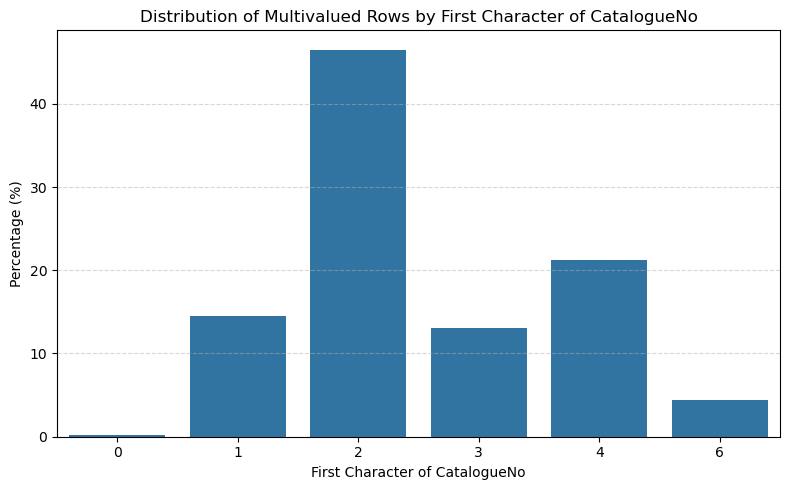

In [57]:
# Step 1: Ensure you're working with the multivalued instructor DataFrame
# (already filtered before)
df_mv = multi_instructor_data1.copy()

# Step 2: Extract first character of CatalogueNo
df_mv['CataloguePrefix'] = df_mv['CatalogueNo'].astype(str).str[0]

# Step 3: Get value counts as a percentage
prefix_distribution = df_mv['CataloguePrefix'].value_counts(normalize=True).sort_index() * 100

# Step 4: Convert to DataFrame for seaborn
dist_df = prefix_distribution.reset_index()
dist_df.columns = ['CataloguePrefix', 'Percentage']

# Step 5: Plot with seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=dist_df, x='CataloguePrefix', y='Percentage')
plt.title('Distribution of Multivalued Rows by First Character of CatalogueNo')
plt.xlabel('First Character of CatalogueNo')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [58]:
# Ensure we're working with a fresh copy
df_mv = multi_instructor_data1.copy()
df_mv['CataloguePrefix'] = df_mv['CatalogueNo'].astype(str).str[0]

# Grouping function to get top repeated Instructor value for a given prefix
def get_top_instructor(prefix):
    filtered = df_mv[df_mv['CataloguePrefix'] == prefix]
    return filtered['Instructor'].value_counts().idxmax()

# Apply for prefix '1', '2', '3'
top_instructor_1 = get_top_instructor('1')
top_instructor_2 = get_top_instructor('2')
top_instructor_3 = get_top_instructor('3')

# Output result
print("Most repeated instructor combination for prefix 1:", top_instructor_1)
print("Most repeated instructor combination for prefix 2:", top_instructor_2)
print("Most repeated instructor combination for prefix 3:", top_instructor_3)

Most repeated instructor combination for prefix 1: HAN JIN KYUNG, HAN JIN KYUNG
Most repeated instructor combination for prefix 2: SEO JI YUN, SEO JI YUN
Most repeated instructor combination for prefix 3: JAYESH AVLANI, CHENG YAM SAN


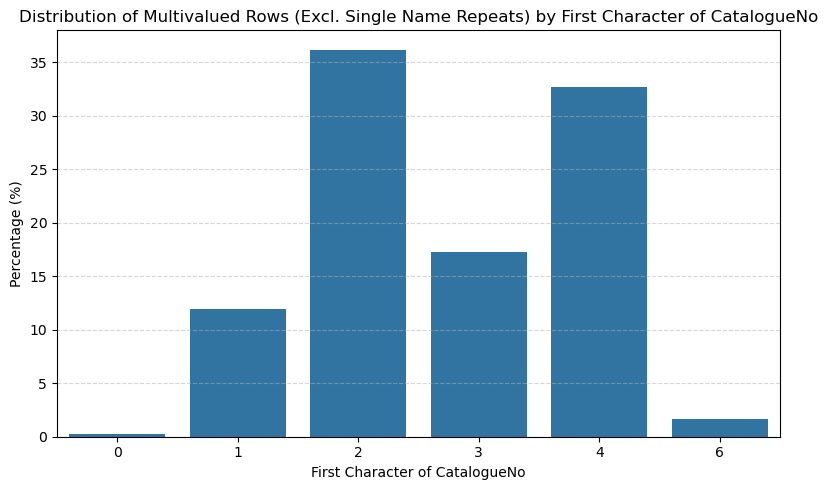

Most repeated instructor combination for prefix 1: TERENCE FAN PING-CHING, JONATHAN TEE
Most repeated instructor combination for prefix 2: THOMAS MENKHOFF, KAN SIEW NING, KEVIN CHEONG
Most repeated instructor combination for prefix 3: JAYESH AVLANI, CHENG YAM SAN


In [59]:
# Step 0: Remove rows with exactly one repeated name
# This gives us only multivalued rows with either multiple distinct instructors or no repeats
df_mv = multi_instructor_data1.copy()
df_mv = df_mv[~df_mv.index.isin(df_exactly_one_repeated.index)].copy()

# Step 1: Extract CataloguePrefix
df_mv['CataloguePrefix'] = df_mv['CatalogueNo'].astype(str).str[0]

# Step 2: Distribution Plot (Seaborn)
prefix_distribution = df_mv['CataloguePrefix'].value_counts(normalize=True).sort_index() * 100
dist_df = prefix_distribution.reset_index()
dist_df.columns = ['CataloguePrefix', 'Percentage']

plt.figure(figsize=(8, 5))
sns.barplot(data=dist_df, x='CataloguePrefix', y='Percentage')
plt.title('Distribution of Multivalued Rows (Excl. Single Name Repeats) by First Character of CatalogueNo')
plt.xlabel('First Character of CatalogueNo')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 3: Top instructor combo per prefix
def get_top_instructor(prefix):
    filtered = df_mv[df_mv['CataloguePrefix'] == prefix]
    return filtered['Instructor'].value_counts().idxmax()

top_instructor_1 = get_top_instructor('1')
top_instructor_2 = get_top_instructor('2')
top_instructor_3 = get_top_instructor('3')

print("Most repeated instructor combination for prefix 1:", top_instructor_1)
print("Most repeated instructor combination for prefix 2:", top_instructor_2)
print("Most repeated instructor combination for prefix 3:", top_instructor_3)

In [62]:
df_mv[df_mv['Instructor'].str.contains('TERENCE FAN PING-CHING, JONATHAN TEE')].head(5).T

,11675,11676,11958,12454,12455
Term,2,2,2,2,2
Description,Strategy(SMU-X),Strategy(SMU-X),Strategy(SMU-X),Strategy(SMU-X),Strategy(SMU-X)
Section,G7,G8,G7,G7,G8
Vacancy,45,45,45,45,45
Before Process Vacancy,12,10,13,11,8
Median Bid,23.51,12.5,14.4,19.49,21.4
Min Bid,20.0,10.0,12.7,19.49,17.8
Instructor,"TERENCE FAN PING-CHING, JONATHAN TEE","TERENCE FAN PING-CHING, JONATHAN TEE","TERENCE FAN PING-CHING, JONATHAN TEE","TERENCE FAN PING-CHING, JONATHAN TEE","TERENCE FAN PING-CHING, JONATHAN TEE"
Grading Basis,Graded,Graded,Graded,Graded,Graded
class1_day,Wed,Thu,Wed,Wed,Thu


In [63]:
df_mv[df_mv['Instructor'].str.contains('THOMAS MENKHOFF, KAN SIEW NING, KEVIN CHEONG')].head(5).T

,123,263,490,876,1836
Term,2,2,2,2,2
Description,Innovations for Asia’s Smart Cities(SMU-X),Innovations for Asia’s Smart Cities(SMU-X),Innovations for Asia’s Smart Cities(SMU-X),Innovations for Asia’s Smart Cities(SMU-X),Innovations for Asia’s Smart Cities(SMU-X)
Section,G1,G1,G1,G1,G1
Vacancy,45,45,45,45,45
Before Process Vacancy,2,4,3,2,6
Median Bid,12.32,12.17,10.0,61.53,77.2
Min Bid,10.34,10.0,10.0,55.05,62.5
Instructor,"THOMAS MENKHOFF, KAN SIEW NING, KEVIN CHEONG","THOMAS MENKHOFF, KAN SIEW NING, KEVIN CHEONG","THOMAS MENKHOFF, KAN SIEW NING, KEVIN CHEONG","THOMAS MENKHOFF, KAN SIEW NING, KEVIN CHEONG","THOMAS MENKHOFF, KAN SIEW NING, KEVIN CHEONG"
Grading Basis,NaN,NaN,NaN,NaN,NaN
class1_day,NaN,NaN,NaN,NaN,NaN


In [64]:
df_mv[df_mv['Instructor'].str.contains('JAYESH AVLANI, CHENG YAM SAN')].head(5).T

,5806,6212,6620,7031,7406
Term,1,1,1,1,1
Description,Trade Finance,Trade Finance,Trade Finance,Trade Finance,Trade Finance
Section,G1,G1,G1,G1,G1
Vacancy,45,45,45,45,45
Before Process Vacancy,2,2,5,3,4
Median Bid,28.0,21.12,18.45,22.0,20.0
Min Bid,28.0,21.12,10.06,20.99,20.0
Instructor,"JAYESH AVLANI, CHENG YAM SAN","JAYESH AVLANI, CHENG YAM SAN","JAYESH AVLANI, CHENG YAM SAN","JAYESH AVLANI, CHENG YAM SAN","JAYESH AVLANI, CHENG YAM SAN"
Grading Basis,Graded,Graded,Graded,Graded,Graded
class1_day,Mon,Mon,Mon,Mon,Mon


## ROOT CAUSE: Flexible classes
Multi-instructor columns could be caused by a few reasons:
1. Dissertation course that requires the guidance of multiple instructors, most likely spanning across different days with no fixed venue.
2. Master/phd level courses where classes are shorter and spanning across different dates, or crammed into a few days.
3. Repeated names exactly once, likely from teaching language classes (Korean, Italian, Japanese).
4. SMU-X courses where instructors take turn teaching the same class across different weeks.

## FIX: Ensure that instructor names are unique and one-hot/vector embedding
- To fix reason 3, make instructor names into a set.
- To fix multivalued instructors, the database will need to allow 1-N from classes to instructors. For pandas dataframe when training, instructors will need to be flattened using one hot encoding or vector embedding, whichever is most beneficial.

## ISSUE: Multivalued class days

In [ ]:
# --- Find multi-valued CLASS DAYS ---
# Step 1: Set the folder path
import os
folder_path = './classTimings'  # or absolute path like 'C:/Users/you/.../classTimings'

# Step 2: List all CSV files
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Step 3: Read and store all CSVs
dfs = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, encoding='utf-8')  # use 'latin1' or 'utf-8-sig' if needed
    dfs.append(df)

# Step 4: Concatenate into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

combined_df['class1_day_cleaned'] = combined_df['class1_day'].fillna('').str.strip()
combined_df['class1_day_count'] = combined_df['class1_day_cleaned'].apply(lambda x: len(set(x.split(','))) if x else 0)

# Filter rows with multiple days
multi_day_combined_df = combined_df[combined_df['class1_day_count'] > 1]
print("\nRows with multiple class days:")
print(multi_day_combined_df[['class1_day']])
print(multi_day_combined_df[['class1_day']].value_counts())



Rows with multiple class days:
                         class1_day
3                Thu, Fri, Sat, Sun
4                Thu, Fri, Sat, Sun
5                Thu, Fri, Sat, Sun
1203             Mon, Wed, Thu, Fri
1206                       Thu, Fri
...                             ...
10637       Mon, Tue, Thu, Fri, Sat
11615                      Tue, Wed
11691                      Tue, Fri
11704  Mon, Tue, Wed, Thu, Fri, Sat
11807                      Tue, Fri

[77 rows x 1 columns]
class1_day                  
Thu, Fri, Sat, Sun              17
Mon, Tue, Wed                    5
Mon, Tue, Wed, Thu, Fri, Sat     4
Tue, Fri                         4
Sat, Sun                         4
Tue, Wed, Thu, Fri               3
Thu, Fri                         3
Wed, Thu, Sat                    3
Tue, Wed, Thu                    3
Mon, Tue, Wed, Thu, Fri          3
Mon, Tue, Fri                    3
Mon, Wed, Thu, Fri               2
Fri, Sat, Sun                    2
Wed, Thu, Fri                

In [66]:
multi_day_combined_df[multi_day_combined_df['class1_day']=='Thu, Fri, Sat, Sun'].head(5).T

,3,4,5,1376,1377
SelectedClassNumber,1005,1007,1008,2828,2829
SelectedAcadTerm,2110,2110,2110,2110,2110
Term,2021-22 Session 1,2021-22 Session 1,2021-22 Session 1,2021-22 Session 1,2021-22 Session 1
Course Code,ACCT666,ACCT635,ECON612,ACCT634,MGMT614A
Section,G1,G1,G1,G1,G1
Description,Financial Reporting in the IFRS World (Part I),Ethics and Social Responsibility,Understanding the Global Economy and Financial...,Risk Governance,Corporate Strategy
Grading Basis,Graded,Graded,Pass/Fail,Graded,Graded
class1_day,"Thu, Fri, Sat, Sun","Thu, Fri, Sat, Sun","Thu, Fri, Sat, Sun","Thu, Fri, Sat, Sun","Thu, Fri, Sat, Sun"
class1_starttime,08:30,16:00,16:00,09:00,09:00
class1_venue,Meeting Rm 4-1,Meeting Rm 4-1,Meeting Rm 4-1,NaN,NaN


In [67]:
total_rows = len(data1)
total_multivalued_day = len(multi_day_combined_df)
pct_multivalued_day = (total_multivalued_day / total_rows) * 100
print(f"Percentage of full dataset with multivalued class days: {pct_multivalued_day:.2f}%")

Percentage of full dataset with multivalued class days: 0.22%


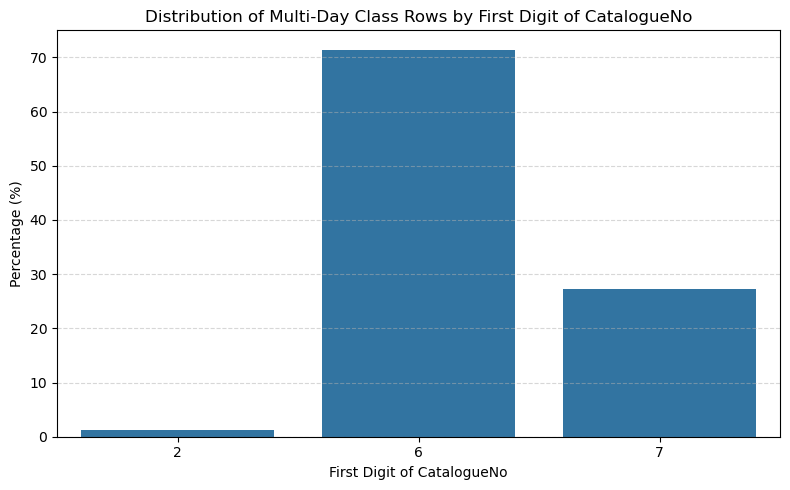

In [75]:
# Step 0: Extract SubjectArea and CatalogueNo (with optional trailing letter)
multi_day_combined_df['SubjectArea'] = multi_day_combined_df['Course Code'].str.extract(r'^([A-Za-z\-]+)')
multi_day_combined_df['CatalogueNo'] = multi_day_combined_df['Course Code'].str.extract(r'(\d+[A-Za-z]?)$')

# Step 0.1: Filter out rows where CatalogueNo is still missing
multi_day_combined_df = multi_day_combined_df.dropna(subset=['CatalogueNo'])

# Step 0.2: Convert CatalogueNo to string and extract first digit
multi_day_combined_df['CatalogueNo'] = multi_day_combined_df['CatalogueNo'].astype(str)

# Step 1: Clean class1_day
multi_day_combined_df['class1_day_cleaned'] = multi_day_combined_df['class1_day'].fillna('').str.strip()
multi_day_combined_df['class1_day_count'] = multi_day_combined_df['class1_day_cleaned'].apply(
    lambda x: len(set(x.split(','))) if x else 0
)

# Step 2: Filter for only multi-day entries
multi_day_combined_df = multi_day_combined_df[multi_day_combined_df['class1_day_count'] > 1]

# Step 3: Extract first digit of CatalogueNo
multi_day_combined_df['CataloguePrefix'] = multi_day_combined_df['CatalogueNo'].str.extract(r'^(\d)')

# Step 4: Calculate percentage distribution
day_prefix_distribution = (
    multi_day_combined_df['CataloguePrefix'].value_counts(normalize=True).sort_index() * 100
)

# Step 5: Convert to DataFrame for plotting
day_dist_df = day_prefix_distribution.reset_index()
day_dist_df.columns = ['CataloguePrefix', 'Percentage']

# Step 6: Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=day_dist_df, x='CataloguePrefix', y='Percentage')
plt.title('Distribution of Multi-Day Class Rows by First Digit of CatalogueNo')
plt.xlabel('First Digit of CatalogueNo')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [83]:
multi_day_combined_df[multi_day_combined_df['CataloguePrefix']=='2'].T

,3014
SelectedClassNumber,1031
SelectedAcadTerm,2132
Term,2021-22 Term 3B
Course Code,SOCG228
Section,G1
Description,Social Entrepreneurship Challenge in the Indo-...
Grading Basis,Graded
class1_day,"Mon, Tue, Wed, Thu, Fri"
class1_starttime,12:00
class1_venue,NaN


## ROOT CAUSE: Flexible timings for postgraduates and partial terms.
- As visible from the chart, most of these multi day timings start with a level 6 or 7, indicating post-graduate studies.
- Additionally, there may be courses that are available over the partial terms of 3A and 3B that require daily participation for a short duration of time.

## ISSUE: Term inconsistent naming convention

In [84]:
data1['Term'].value_counts()

Term
2     16437
1     16247
2      2966
3A       62
3B       22
Name: count, dtype: int64

In [107]:
import pandas as pd
import glob
import re
import os

def standardize_term(term_str):
    """Standardize term formats to a common 4-digit code."""
    if pd.isna(term_str) or term_str is None:
        return None

    term_str = str(term_str).strip()

    ay_term_to_code = {
        '2021-22_T1': '2110', '2021-22_T2': '2120', '2021-22_T3A': '2131', '2021-22_T3B': '2132',
        '2022-23_T1': '2210', '2022-23_T2': '2220', '2022-23_T3A': '2231', '2022-23_T3B': '2232',
        '2023-24_T1': '2310', '2023-24_T2': '2320', '2023-24_T3A': '2331', '2023-24_T3B': '2332'
    }

    inconsistent_names = {
        '2021-22 Session 1': '2110', '2021-22 Session 2': '2120',
        '2021-22 January Term': '2110', '2021-22 May Term': '2120',
        '2022-23 Session 1': '2210', '2022-23 Session 2': '2220',
        '2022-23 January Term': '2210', '2022-23 May Term': '2220',
    }

    if term_str in inconsistent_names:
        return inconsistent_names[term_str]

    match = re.match(r'(\d{4}-\d{2}_T\d[A-Z]?)', term_str)
    if match:
        return ay_term_to_code.get(match.group(1))

    if re.match(r'^\d{4}$', term_str):
        return term_str

    return None

def analyze_drops():
    """Identify scraped rows with unmatched or unstandardised terms."""

    # Load all BOSS data
    boss_files = glob.glob('overallBossResults/*.xls*')
    boss_data_list = []

    for file in boss_files:
        try:
            filename = os.path.basename(file)
            term_match = re.match(r'(\d{4}-\d{2}_T\d[A-Z]?)', filename)
            if term_match:
                std_term = standardize_term(term_match.group(1))
                df = pd.read_excel(file)
                if 'Course Code' in df.columns and 'Section' in df.columns:
                    df['StdTerm'] = std_term
                    boss_data_list.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")

    boss_df = pd.concat(boss_data_list, ignore_index=True) if boss_data_list else pd.DataFrame()

    # Load all classTimings data
    class_files = glob.glob('classTimings/*.csv')
    class_data_list = []

    for file in class_files:
        try:
            df = pd.read_csv(file)
            if 'Term' in df.columns:
                df['OriginalTerm'] = df['Term']
                df['StdTerm'] = df['Term'].apply(standardize_term)
                class_data_list.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")

    class_df = pd.concat(class_data_list, ignore_index=True) if class_data_list else pd.DataFrame()

    if boss_df.empty or class_df.empty:
        print("Missing data. One or both folders may be empty.")
        return pd.DataFrame()

    # Create matching keys
    boss_df['key'] = boss_df['Course Code'].astype(str) + '_' + boss_df['Section'].astype(str) + '_' + boss_df['StdTerm'].astype(str)
    class_df['key'] = class_df['Course Code'].astype(str) + '_' + class_df['Section'].astype(str) + '_' + class_df['StdTerm'].astype(str)

    # Detect dropped rows
    boss_keys = set(boss_df['key'])
    class_df['isDropped'] = ~class_df['key'].isin(boss_keys)

    dropped_df = class_df[class_df['isDropped']].copy()

    # Generate BOSS links
    dropped_df['BossLink'] = dropped_df.apply(
        lambda row: f"https://boss.intranet.smu.edu.sg/ClassDetails.aspx?SelectedAcadTerm={row['SelectedAcadTerm']}&SelectedClassNumber={row['SelectedClassNumber']}"
        if pd.notna(row.get('SelectedAcadTerm')) and pd.notna(row.get('SelectedClassNumber')) else "N/A",
        axis=1
    )

    # Save to file
    dropped_df.to_csv('all_dropped_rows.csv', index=False)

    # Print summary
    total = len(class_df)
    dropped = len(dropped_df)
    pct = (dropped / total) * 100 if total else 0

    print(f"✅ Total scraped rows: {total}")
    print(f"⚠️ Dropped rows: {dropped} ({pct:.2f}%)")

    if dropped > 0:
        print("📌 Example dropped rows with BOSS links:")
        print(dropped_df[['Term', 'Course Code', 'Section', 'BossLink']].head(5))

    # 🧠 Analyse whether inconsistent terms still matched thanks to standardisation
    inconsistent_term_names = {
        '2021-22 Session 1', '2021-22 Session 2', '2021-22 January Term', '2021-22 May Term',
        '2022-23 Session 1', '2022-23 Session 2', '2022-23 January Term', '2022-23 May Term'
    }

    matched_from_inconsistent = class_df[
        (class_df['OriginalTerm'].isin(inconsistent_term_names)) & (~class_df['isDropped'])
    ]

    print(f"\n🎯 Matched rows using inconsistent term names: {len(matched_from_inconsistent)}")
    print(matched_from_inconsistent[['OriginalTerm', 'StdTerm', 'Course Code', 'Section']].head())

    return dropped_df

# Execute
dropped_data = analyze_drops()

✅ Total scraped rows: 11883
⚠️ Dropped rows: 4636 (39.01%)
📌 Example dropped rows with BOSS links:
                Term Course Code Section  \
0  2021-22 Session 1     MGMT715      G1   
1  2021-22 Session 1    LGST700A      G1   
2  2021-22 Session 1    STAT701A      G1   
3  2021-22 Session 1     ACCT666      G1   
4  2021-22 Session 1     ACCT635      G1   

                                            BossLink  
0  https://boss.intranet.smu.edu.sg/ClassDetails....  
1  https://boss.intranet.smu.edu.sg/ClassDetails....  
2  https://boss.intranet.smu.edu.sg/ClassDetails....  
3  https://boss.intranet.smu.edu.sg/ClassDetails....  
4  https://boss.intranet.smu.edu.sg/ClassDetails....  

🎯 Matched rows using inconsistent term names: 0
Empty DataFrame
Columns: [OriginalTerm, StdTerm, Course Code, Section]
Index: []


In [102]:
dropped_data['Term'].value_counts()

Term
2021-22 Term 1          528
2021-22 Term 2          507
2022-23 Term 1          437
2022-23 Term 2          415
2023-24 Term 2          413
2023-24 Term 1          409
2024-25 Term 1          267
2023-24 August Term     170
2021-22 January Term    164
2022-23 January Term    160
2024-25 Term 2          157
2022-23 August Term     157
2023-24 January Term    154
2024-25 August Term     146
2021-22 August Term     125
2024-25 January Term    124
2024-25 Session 1        31
2021-22 Session 1        29
2021-22 Session 2        27
2023-24 Session 2        26
2022-23 Session 2        25
2023-24 Session 1        25
2021-22 Term 3A          23
2021-22 Term 3B          23
2022-23 Session 1        22
2022-23 Term 3B          18
2024-25 Session 2        17
2023-24 Term 3B          15
2022-23 Term 3A          14
2023-24 Term 3            5
2023-24 Term 3A           3
Name: count, dtype: int64

In [103]:
dropped_data.tail(5).T

,11877,11879,11880,11881,11882
SelectedClassNumber,2781,2783,2784,2785,2786
SelectedAcadTerm,2420,2420,2420,2420,2420
Term,2024-25 Term 2,2024-25 Term 2,2024-25 Term 2,2024-25 Term 2,2024-25 Term 2
Course Code,IDST713,INTS401,INTS401,INTS401,INTS401
Section,G3,G2,G3,G4,G5
Description,Independent Study,Senior Thesis,Senior Thesis,Senior Thesis,Senior Thesis
Grading Basis,Graded,Graded,Graded,Graded,Graded
class1_day,NaN,,,,
class1_starttime,NaN,TBA,TBA,TBA,TBA
class1_venue,NaN,NaN,NaN,NaN,NaN


## Visualisation of data

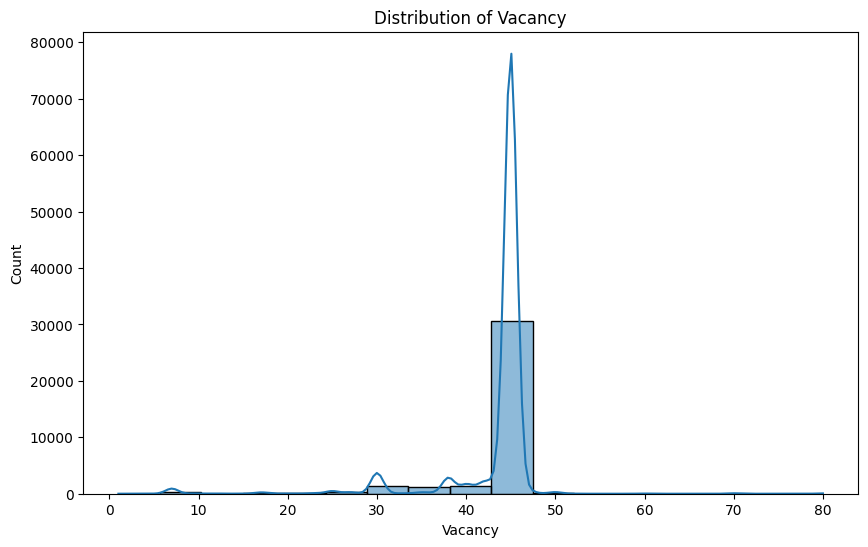

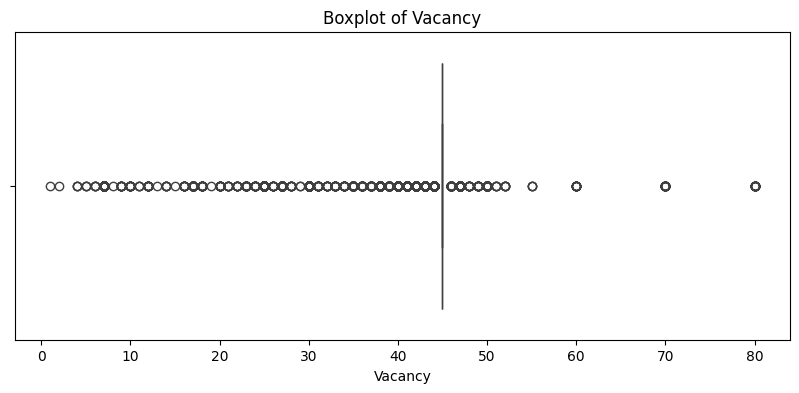

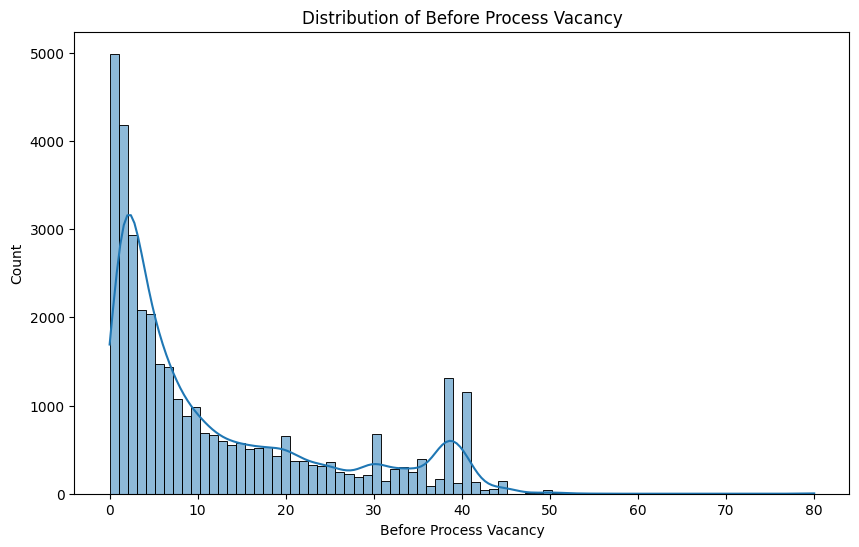

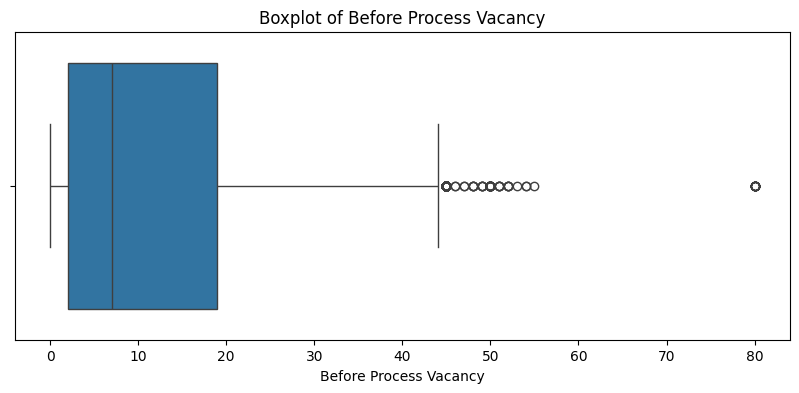

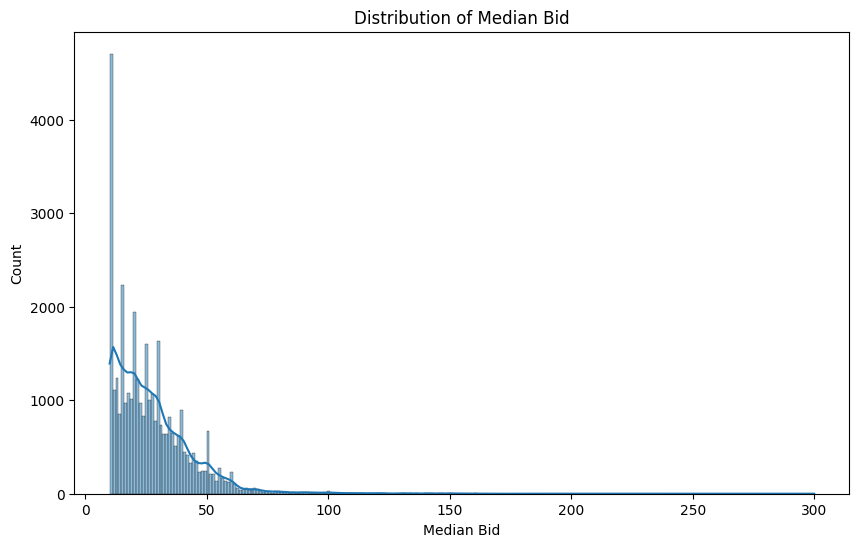

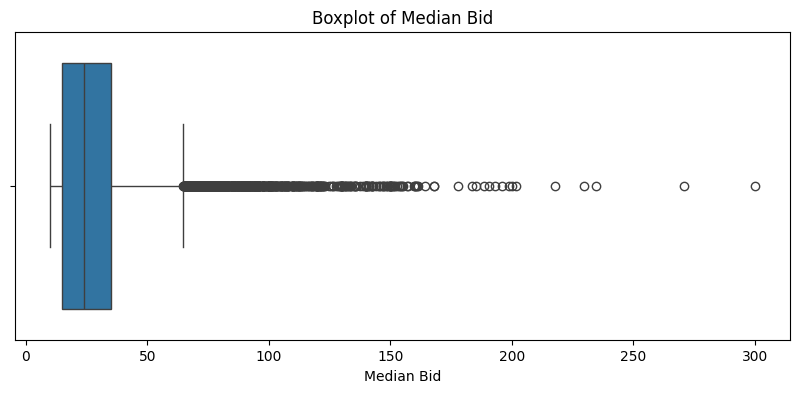

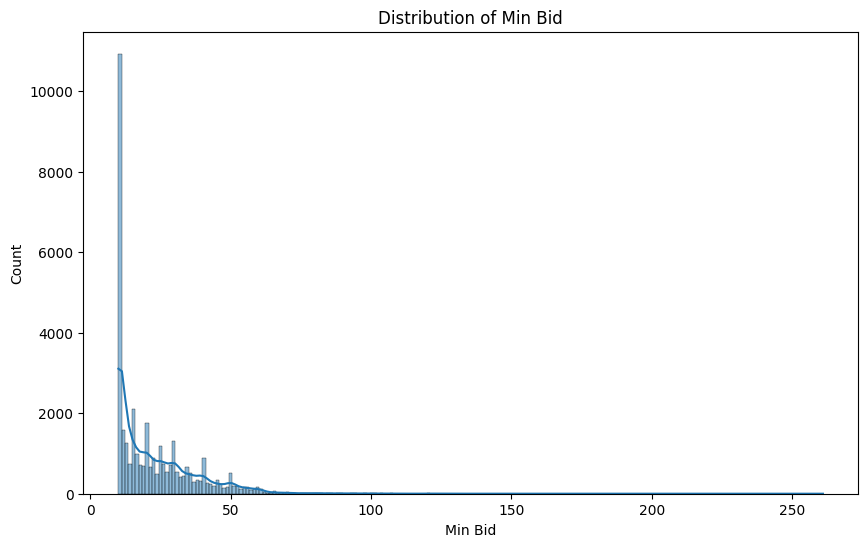

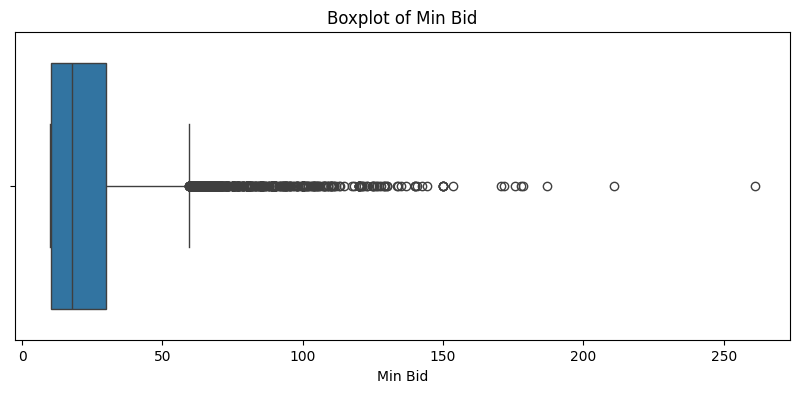

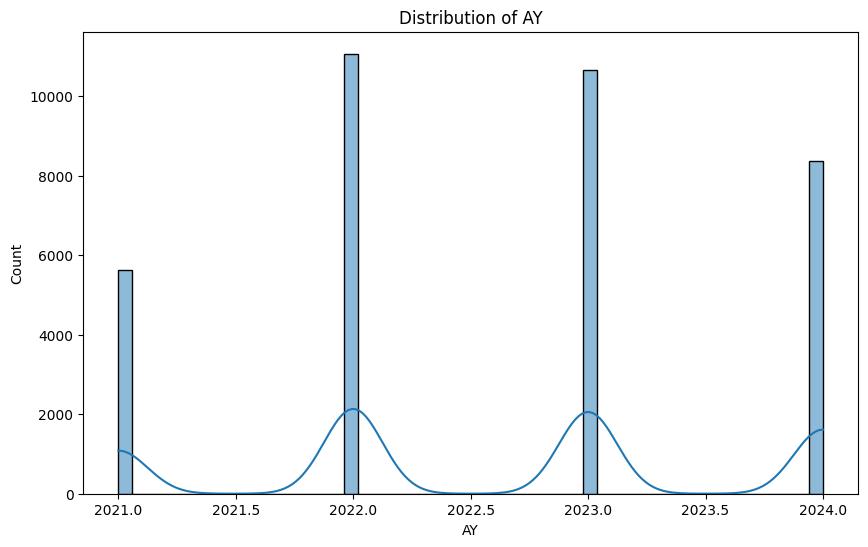

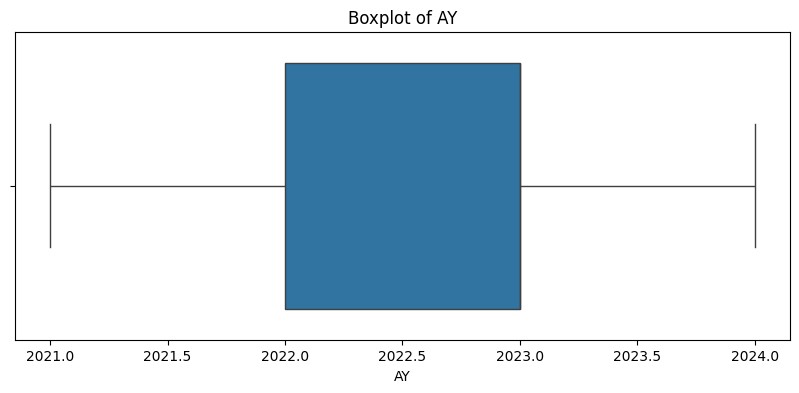

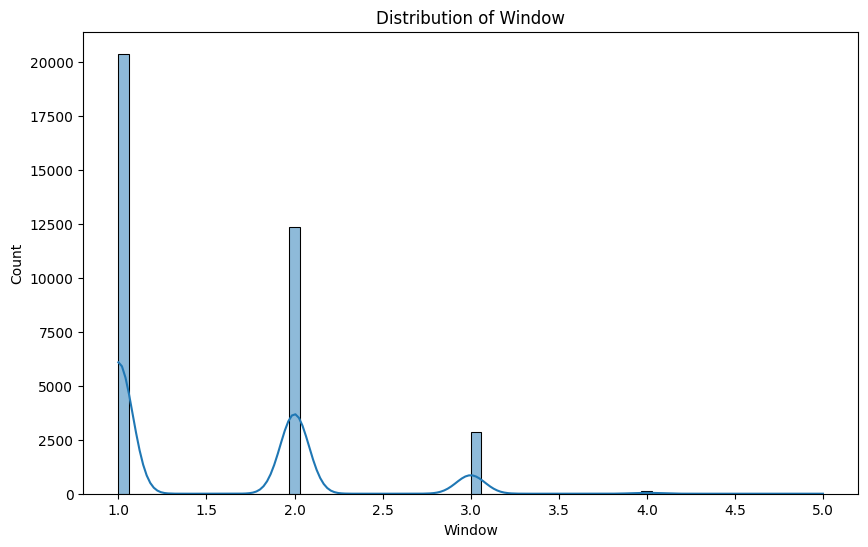

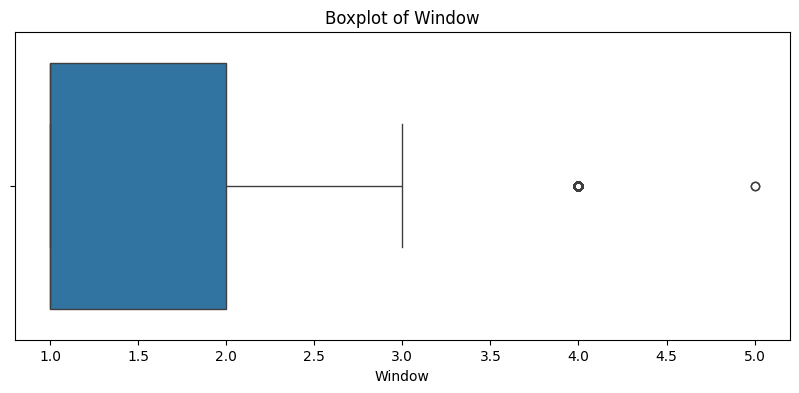

In [ ]:
numeric_cols = ['Vacancy', 'Before Process Vacancy', 'Median Bid', 'Min Bid', 'AY', 'Window']
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    # Check for outliers with boxplot
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

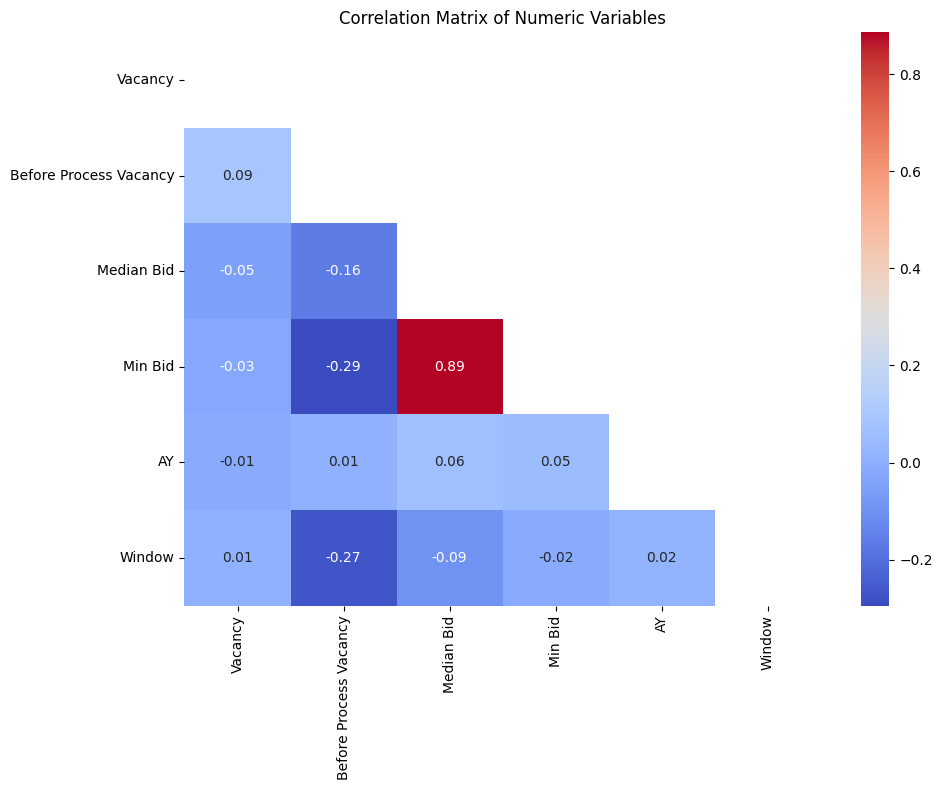

In [ ]:
# 4. Correlation heatmap for numeric variables
plt.figure(figsize=(10, 8))
corr = data[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

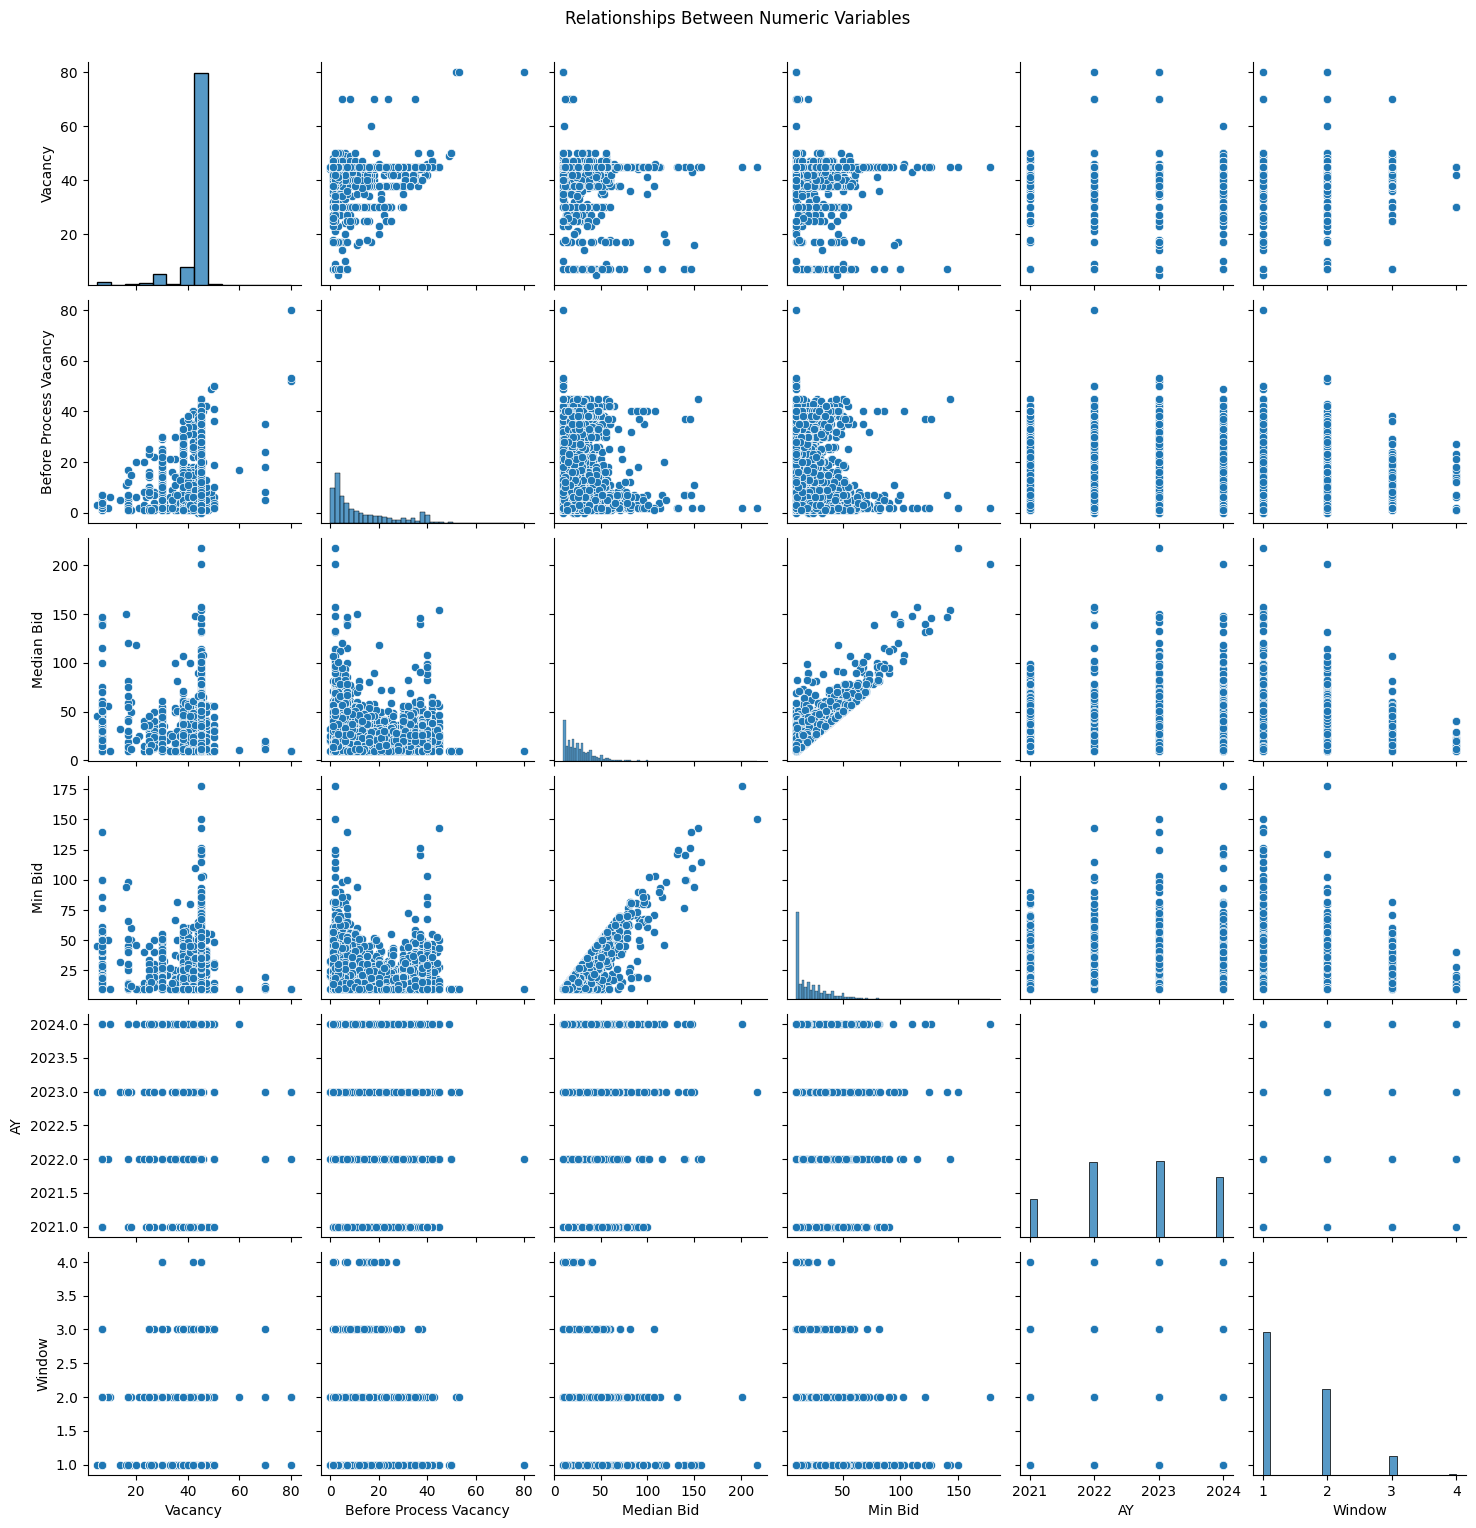

In [ ]:
# 5. Pairplot for relationships between numeric variables
# Sample if dataset is large
sample_data = data.sample(min(5000, len(data)))
sns.pairplot(sample_data[numeric_cols])
plt.suptitle('Relationships Between Numeric Variables', y=1.02)
plt.show()

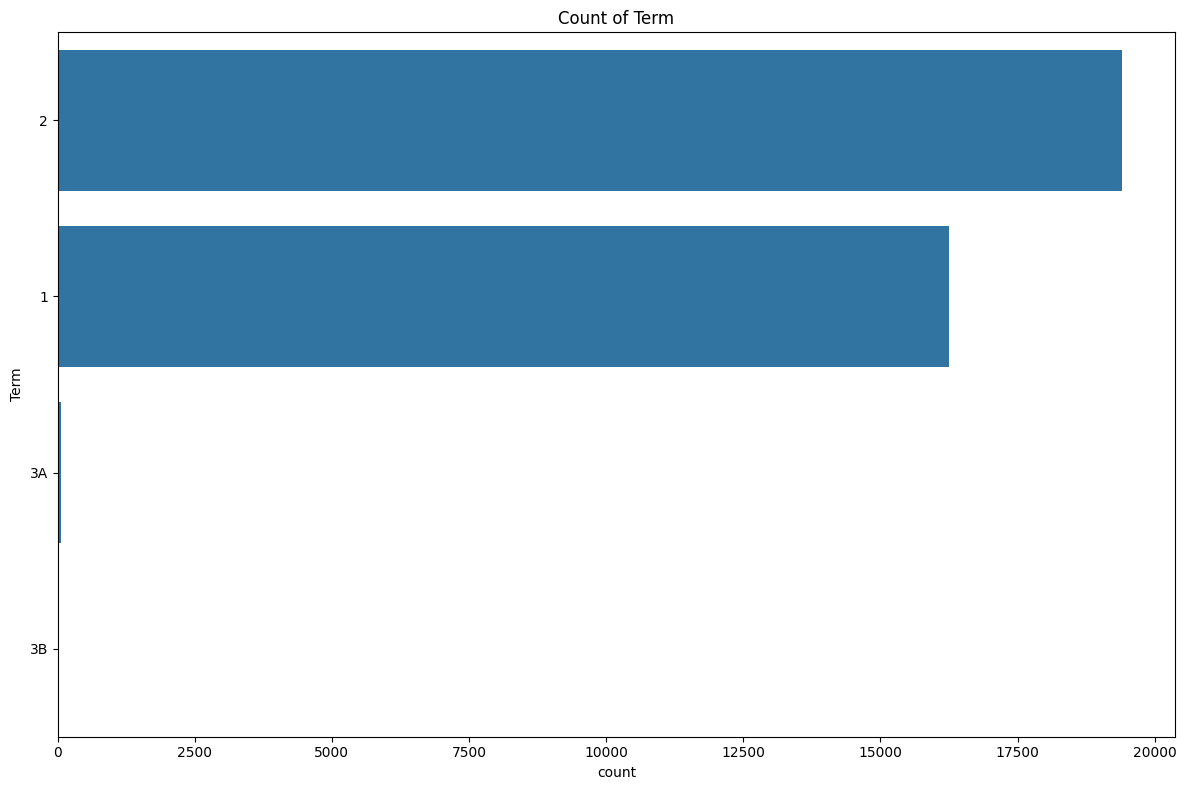

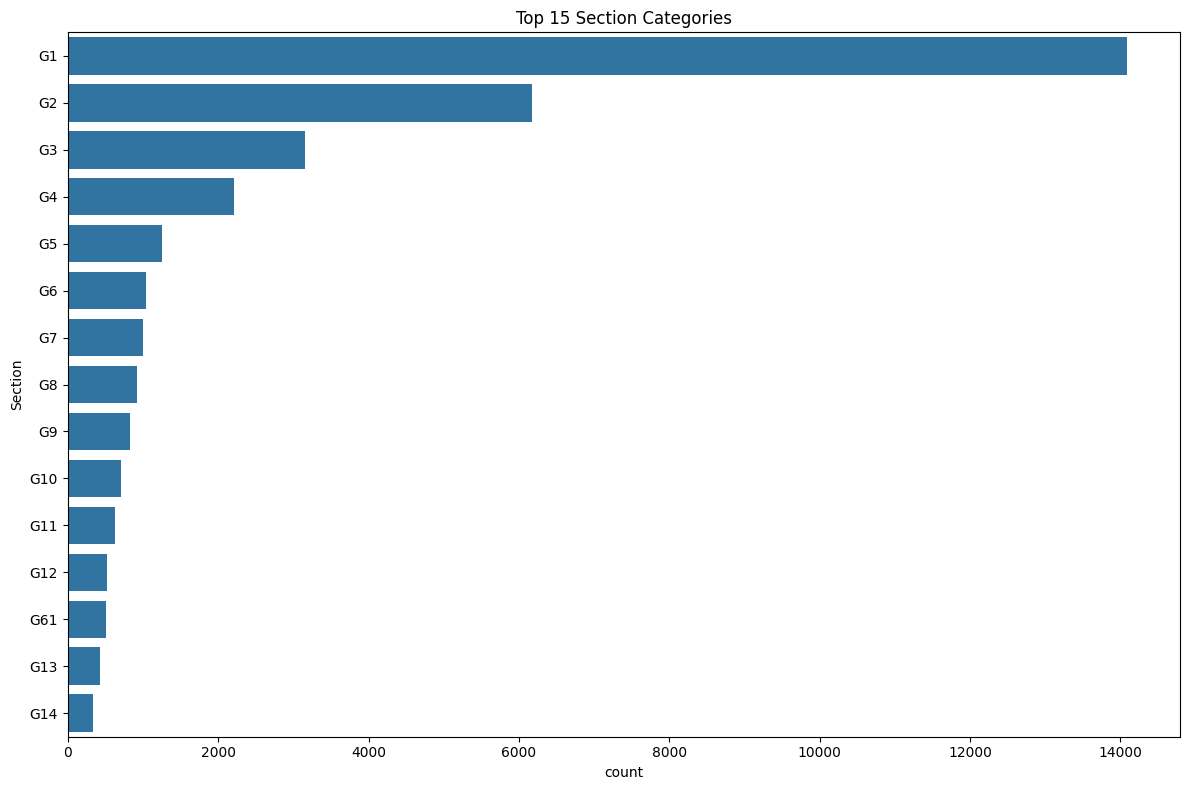

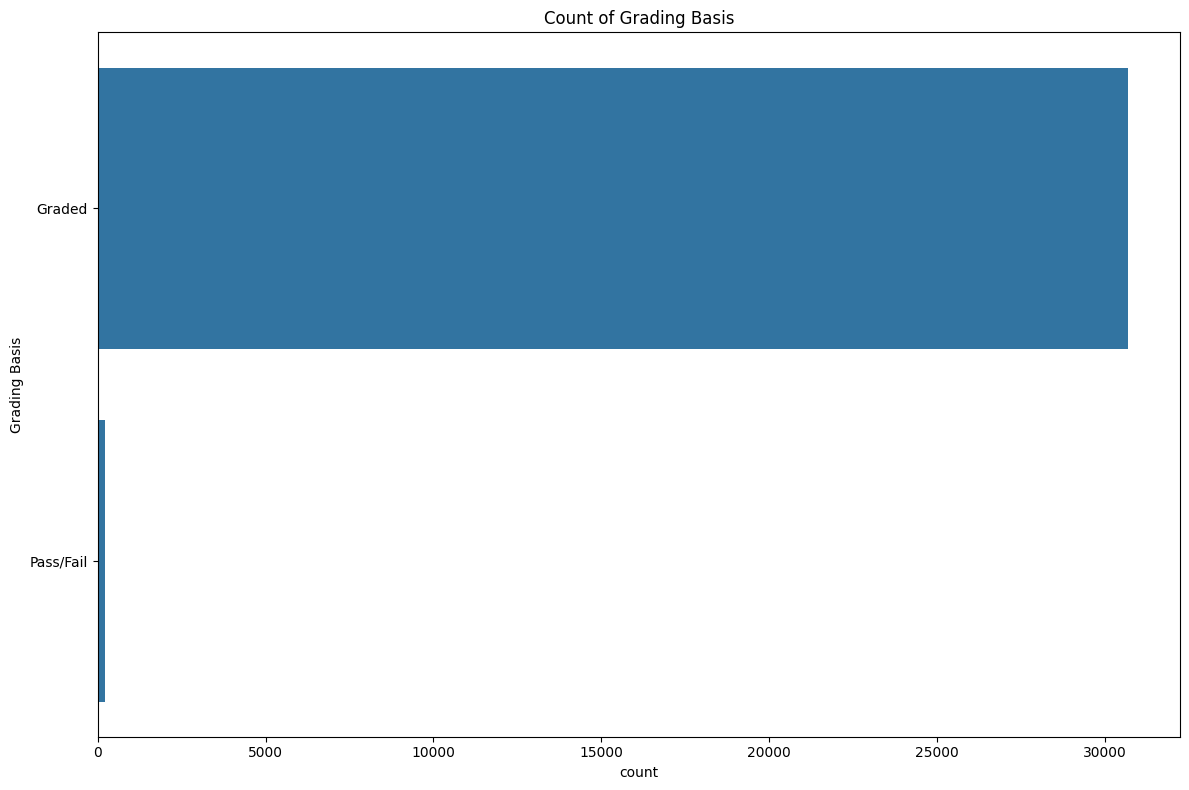

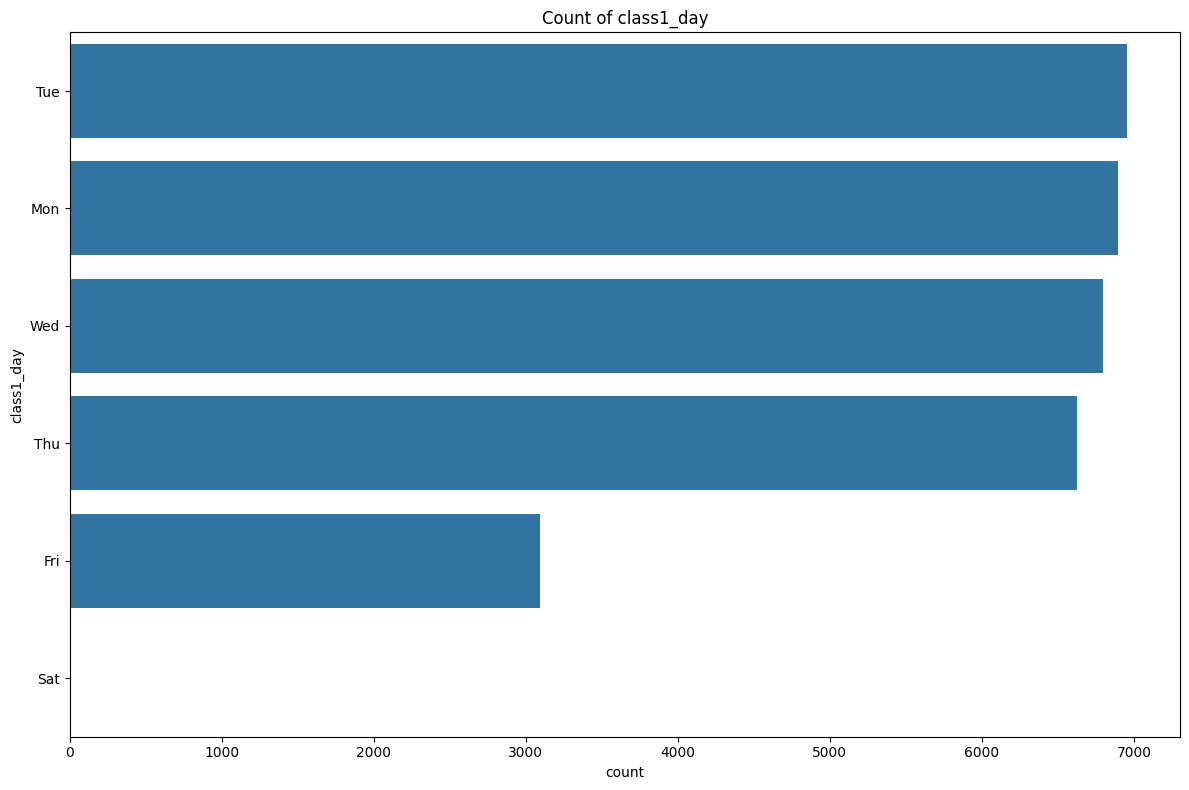

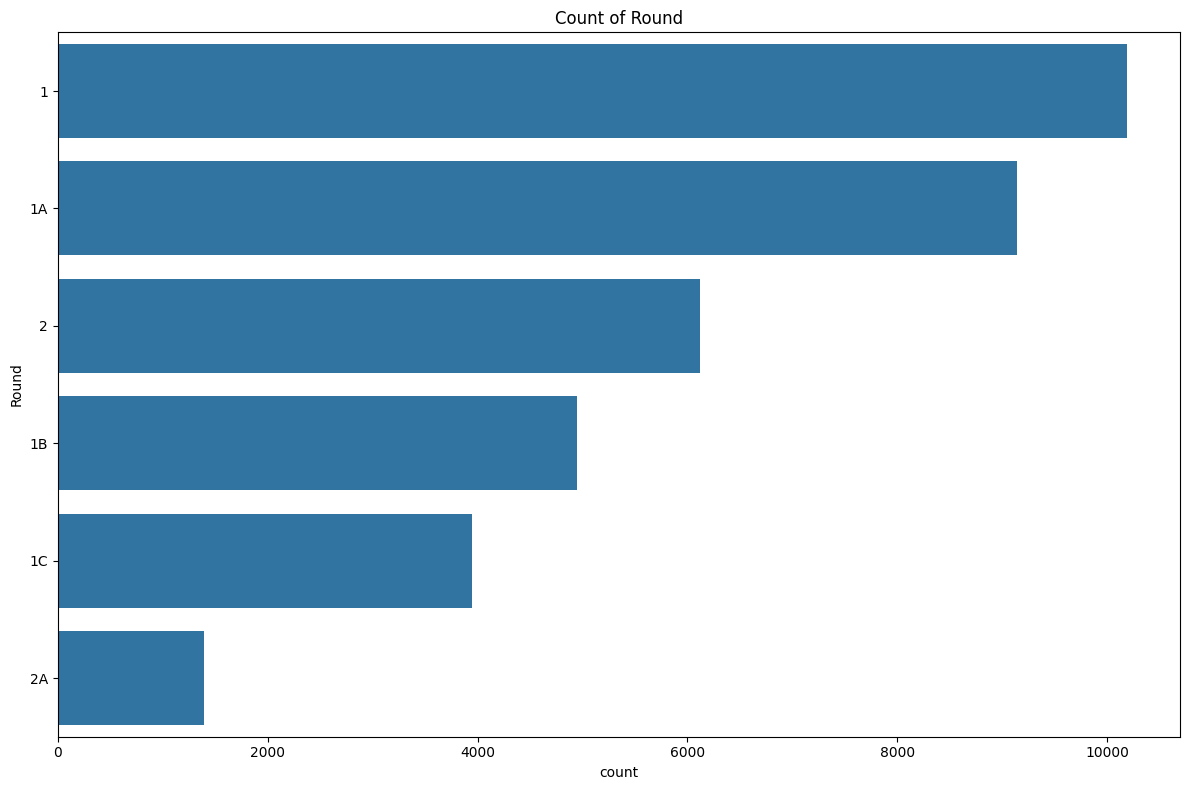

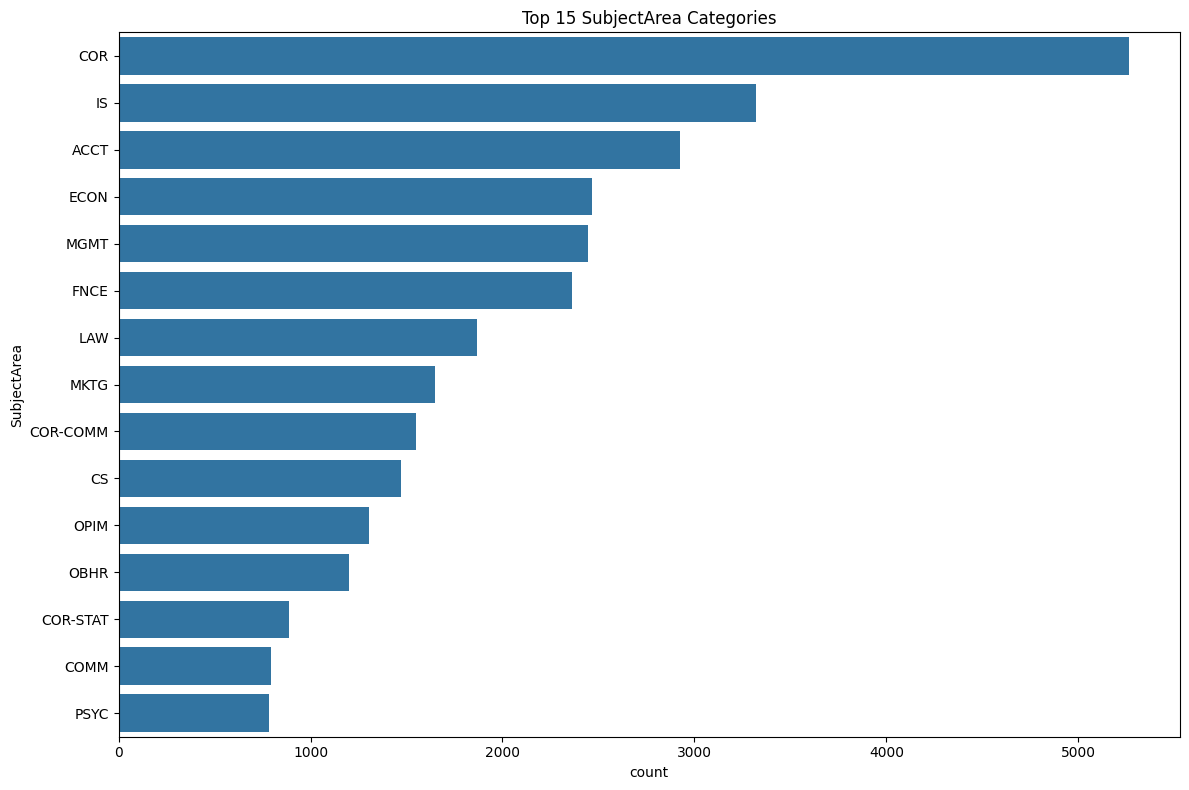

In [ ]:
# 6. Top categories in categorical columns
cat_cols = ['Term', 'Section', 'Grading Basis', 'class1_day', 'Round', 'SubjectArea']
for col in cat_cols:
    if data[col].nunique() > 15:
        # Too many categories, show top 15
        top_cats = data[col].value_counts().nlargest(15).index
        plt.figure(figsize=(12, 8))
        sns.countplot(y=data[col][data[col].isin(top_cats)], 
                      order=data[col][data[col].isin(top_cats)].value_counts().index)
        plt.title(f'Top 15 {col} Categories')
    else:
        plt.figure(figsize=(12, 8))
        sns.countplot(y=data[col], order=data[col].value_counts().index)
        plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

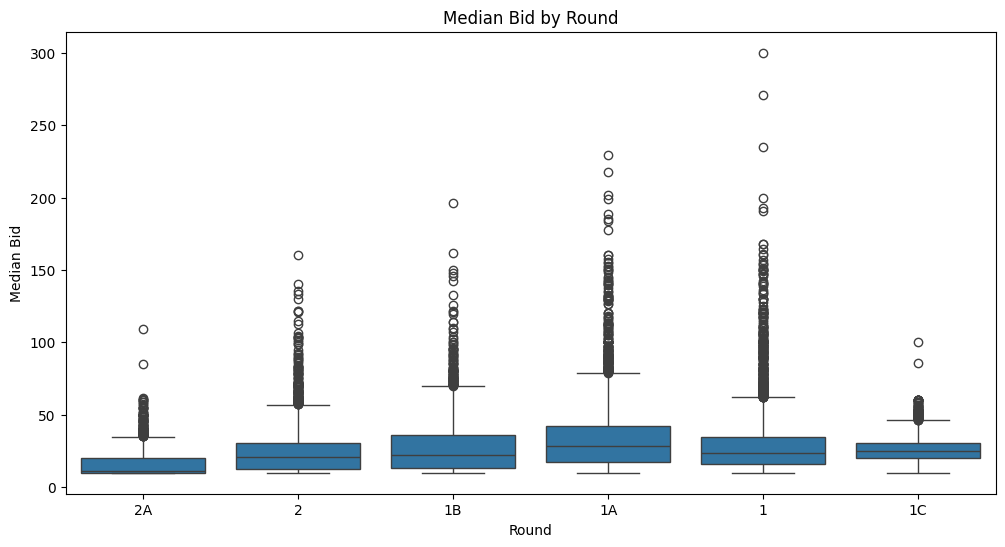

In [ ]:
# 7. Categorical vs. Numeric relationships
# Median Bid by Round
plt.figure(figsize=(12, 6))
sns.boxplot(x='Round', y='Median Bid', data=data)
plt.title('Median Bid by Round')
plt.show()

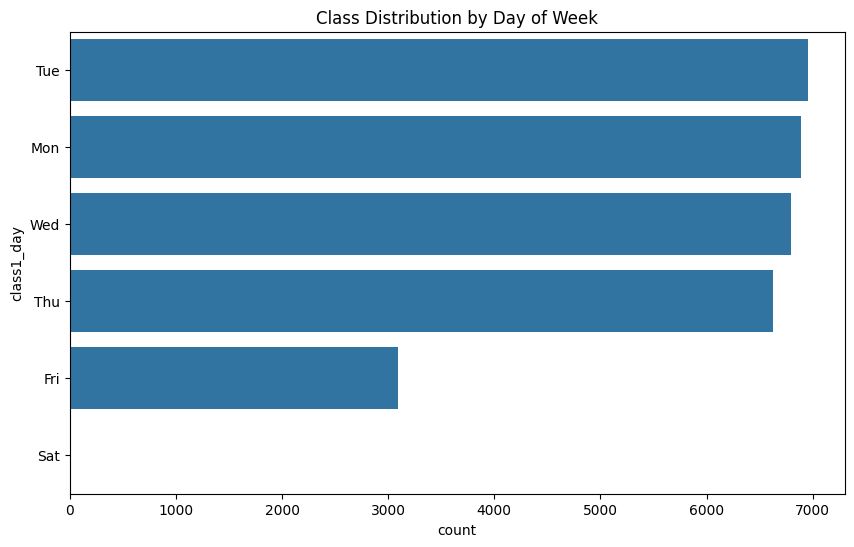

In [ ]:
# 8. Class schedule patterns
# Count of class1_day (when it exists)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['class1_day'].dropna(), 
              order=data['class1_day'].dropna().value_counts().index)
plt.title('Class Distribution by Day of Week')
plt.show()

### Fitting a linear curve to `Before Process Vacancy`, `Median bid`, `Min Bid`

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

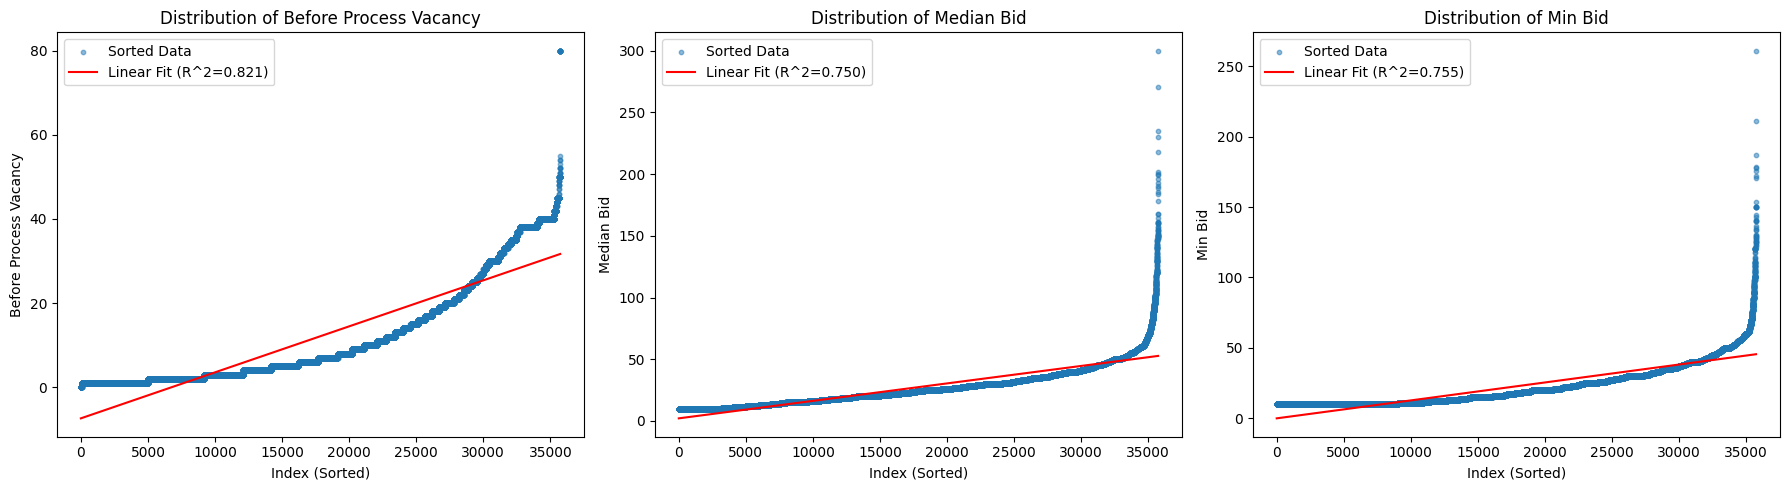

{'Before Process Vacancy': 0.821072612785603, 'Median Bid': 0.7501062042635382, 'Min Bid': 0.7547945351414993}


In [ ]:
# Assuming 'data' is your DataFrame 
variables = ['Before Process Vacancy', 'Median Bid', 'Min Bid']
r2_scores = {}

plt.figure(figsize=(18, 5))

for i, var in enumerate(variables, 1):
    # Drop NA values
    vals = data[var].dropna().values.reshape(-1, 1)
    # Sort values to create a distribution curve
    sorted_vals = np.sort(vals, axis=0)
    # Create an index array as the independent variable
    X = np.arange(len(sorted_vals)).reshape(-1, 1)
    y = sorted_vals
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    r2_scores[var] = r2
    
    # Plot the distribution and the linear fit
    plt.subplot(1, 3, i)
    plt.scatter(X, y, s=10, alpha=0.5, label='Sorted Data')
    plt.plot(X, y_pred, color='red', label=f'Linear Fit (R^2={r2:.3f})')
    plt.title(f'Distribution of {var}')
    plt.xlabel('Index (Sorted)')
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

print(r2_scores)

## Conclusion

### Issues identified:
1. Scraping logic not waiting for website to be fully loaded, skipping it
2. (1) There is no physical class or (2) Class no longer exists
3. `class1_day`, `class1_venue`, `class1_starttime` are not consistent
4. Power law distribution for `Before Process Vacancy`, `Median Bid`, `Min Bid`


### Fixes needed:
1. Wait until page is healthy before scraping
2. Filter out classes that did not reach Round 2A Window 3
3. Fixing item 1 will also fix this issue
4. Leave as it is or consider transforming variables. Should have minimal impact since CatBoost is flexible to outliers and skewed data